Group Members: Victoria Blante, Yonathan Amare, Maxwell Guevarra

MSDS 593-02

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import warnings
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

warnings.filterwarnings("ignore", message="findfont: Font family.*")

%config InlineBackend.figure_format = 'retina'

In [65]:
spotify = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding = 'ISO-8859-1')
spotify.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [66]:
#Changing Feature Types
spotify['Release Date'] = pd.to_datetime(spotify['Release Date'])
spotify['TikTok Posts'] = spotify['TikTok Posts'].str.replace(',', '').astype(float)
spotify['TikTok Likes'] = spotify['TikTok Likes'].str.replace(',', '').astype(float)
spotify['TikTok Views'] = spotify['TikTok Views'].str.replace(',', '').astype(float)
spotify['Spotify Streams'] = spotify['Spotify Streams'].str.replace(',', '').astype(float)
spotify['YouTube Views'] = spotify['YouTube Views'].str.replace(',', '').astype(float)

numeric_columns = [
    'Spotify Playlist Count', 'Spotify Playlist Reach', 
    'YouTube Likes', 'YouTube Playlist Reach', 'AirPlay Spins', 'SiriusXM Spins', 
    'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 
    'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts'
]

for column in numeric_columns:
    spotify[column] = spotify[column].astype(str)
    spotify[column] = pd.to_numeric(spotify[column].str.replace(',', ''), errors='coerce')

In [67]:
#Sort Data by Number of Spotify Streams
#Note: Removed Entries/Songs that were duplicates, remixes (of existing songs)
stream_order_all = spotify.sort_values(by = 'Spotify Streams', ascending=False)
stream_order_all = stream_order_all.drop([4254, 1637, 3406, 2397])
top15_all = stream_order_all.iloc[0:15,:]

In [68]:
#Classified each song by their "main" genre
top15_all['Genre'] = ['Synth-Pop', 'Dancehall', 'Adult Contemporary', 'Hip-Hop/Rap', 'Synth-Pop', 
                      'R&B', 'Dancehall', 'Synth-Pop', 'Electro-Pop', 'Pop-Rock', 
                      'Alternative-Pop', 'Adult Contemporary','Hip-Hop/Rap', 'Alternative-Pop', 'Electro-Pop']

/var/folders/n7/jkmtqxnx19x9v_2mdwnbxlsw0000gn/T/ipykernel_6940/1892237107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top15_all['Genre'] = ['Synth-Pop', 'Dancehall', 'Adult Contemporary', 'Hip-Hop/Rap', 'Synth-Pop',


In [69]:
#Counting number of songs per genre for plot
counts_all = {}
for k in top15_all['Genre']:
    if k not in counts_all:
        counts_all[k] = 0
    counts_all[k] += 1 

In [70]:
#Finding the song with the highest track score (within the Top 15)
max_track_score = top15_all[top15_all['Track Score'] == top15_all['Track Score'].max()]['Track Score']

In [71]:
#Color Map
color_m = {'Synth-Pop':'tab:blue', 'Dancehall':'tab:orange', 'Adult Contemporary':'tab:green', 'Hip-Hop/Rap':'aquamarine', 
           'R&B':'tab:red', 'Electro-Pop':'tab:purple', 'Pop-Rock':'tab:brown', 'Alternative-Pop':'tab:pink', 
           'Reggaeton':'tab:gray', 'Country':'tab:olive', 'Dance-Pop':'tab:cyan'}

/var/folders/n7/jkmtqxnx19x9v_2mdwnbxlsw0000gn/T/ipykernel_6940/1706736717.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Blinding Lights', 'Shape of You', 'Someone You Loved', 'Sunflower',
/var/folders/n7/jkmtqxnx19x9v_2mdwnbxlsw0000gn/T/ipykernel_6940/1706736717.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])


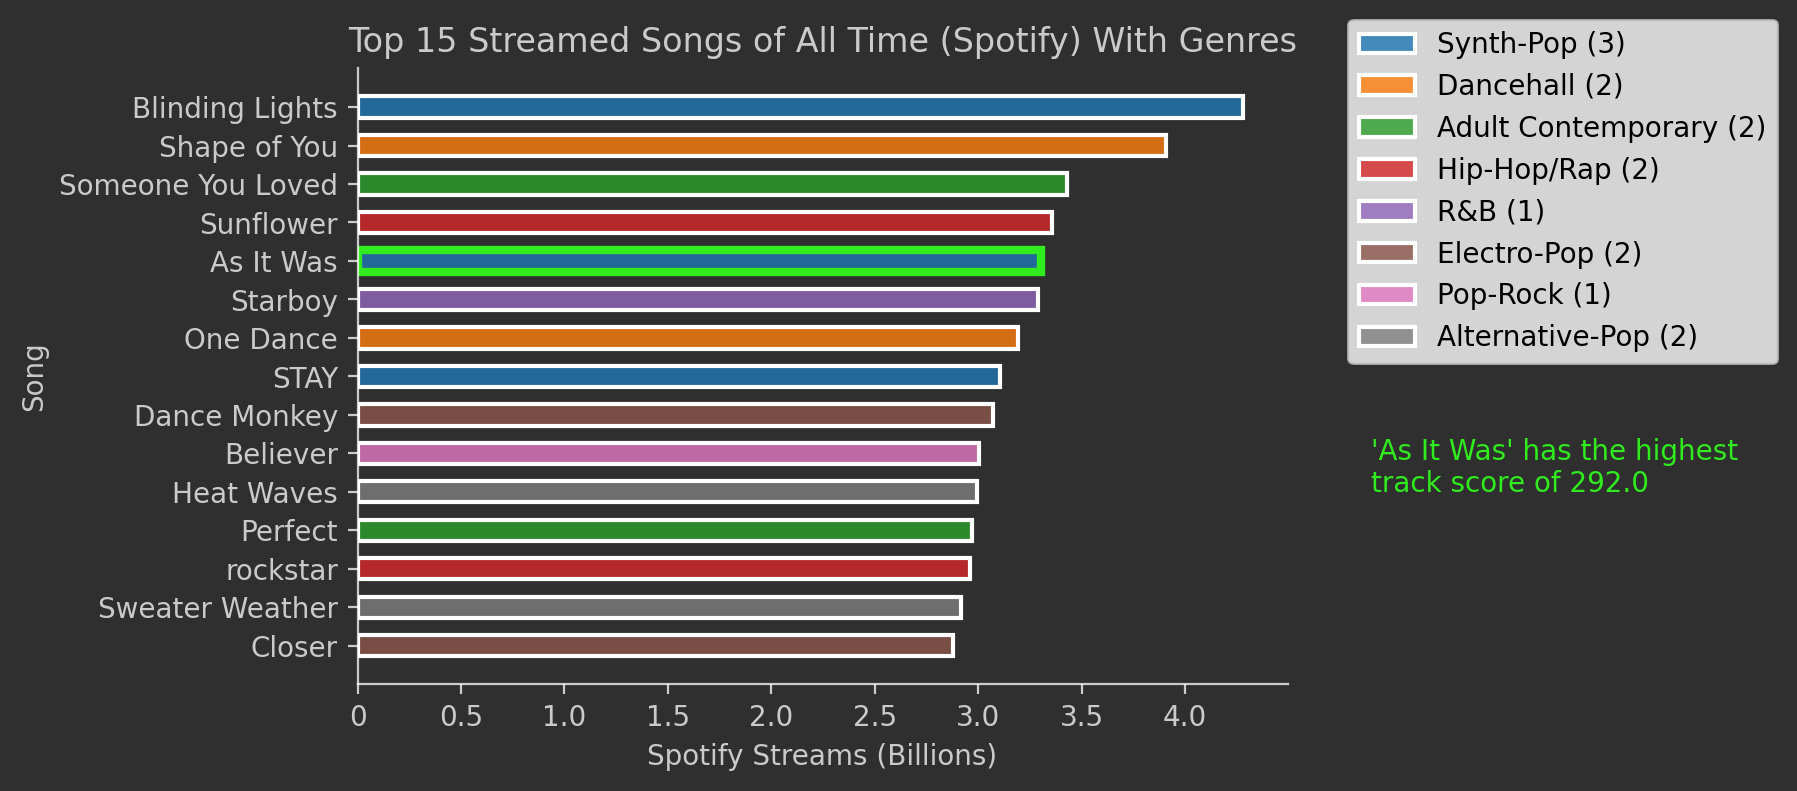

In [72]:
#Barplot for the Top 15 most streamed songs on Spotify
fig, ax = plt.subplots(figsize=(6,4))
for i in range(len(top15_all)):
    edge = '#ffffff'
    line_w = 1.5
    if top15_all['Genre'].iloc[i] == 'Synth-Pop':
        clr = ('tab:blue', 0.8)
    elif top15_all['Genre'].iloc[i] == 'Dancehall':
        clr = ('tab:orange', 0.8)
    elif top15_all['Genre'].iloc[i] == 'Adult Contemporary':
        clr = ('tab:green', 0.8)
    elif top15_all['Genre'].iloc[i] == 'Hip-Hop/Rap':
        clr = ('tab:red', 0.8)
    elif top15_all['Genre'].iloc[i] == 'R&B':
        clr = ('tab:purple', 0.8)
    elif top15_all['Genre'].iloc[i] == 'Electro-Pop':
        clr = ('tab:brown', 0.8)
    elif top15_all['Genre'].iloc[i] == 'Pop-Rock':
        clr = ('tab:pink', 0.8)
    elif top15_all['Genre'].iloc[i] == 'Alternative-Pop':
        clr = ('tab:grey', 0.8)
    else:
        clr = '#3d00ad'
    if top15_all['Track Score'].iloc[i] == top15_all['Track Score'].max():
        edge = '#30eb1e'
        line_w = 3
    ax.barh(top15_all['Track'].iloc[i], top15_all['Spotify Streams'].iloc[i], color = clr, 
            label = top15_all['Genre'].iloc[i], height = 0.55, edgecolor = edge, linewidth = line_w)
ax.invert_yaxis()

ax.set_title('Top 15 Streamed Songs of All Time (Spotify) With Genres')
ax.set_ylabel('Song', color = ('#ffffff', 0.75))
ax.set_xlabel('Spotify Streams (Billions)', color = ('#ffffff', 0.75))
ax.title.set_color(('#ffffff', 0.75))
ax.tick_params(axis = 'x', colors = ('#ffffff', 0.75))
ax.tick_params(axis = 'y', colors = ('#ffffff', 0.75))

ax.set_yticklabels(['Blinding Lights', 'Shape of You', 'Someone You Loved', 'Sunflower', 
                    'As It Was', 'Starboy', 'One Dance', 'STAY', 'Dance Monkey', 'Believer', 
                    'Heat Waves', 'Perfect', 'rockstar', 'Sweater Weather', 'Closer'])
ax.set_xticklabels([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])

ax.set_facecolor('#2f2f2f')
fig.set_facecolor('#2f2f2f')

hndls, lbls = plt.gca().get_legend_handles_labels()
by_lbl = dict(zip(lbls, hndls))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(('#ffffff', 0.75))
ax.spines['bottom'].set_color(('#ffffff', 0.75))

ax.text(s = "'As It Was' has the highest\n" + "track score of 292.0", x = 4900000000, y = 10, color = ('#30eb1e'))

legend_labels = []
for i in range(len(counts_all)):
    lbl = str(list(by_lbl.keys())[i])
    c = str(list(counts_all.values())[i])
    legend_labels.append(lbl + " (" + c + ')')

plt.legend(by_lbl.values(), legend_labels, loc = 'center left', bbox_to_anchor = (1.05, 0.8))
plt.show()

In [73]:
#Finding the top 15 songs from 2024
#Note: Many songs were incorrectly classified as being under 2024---manually removed these songs in addition to the previous filtering criteria
top15_2024 = spotify[spotify['Release Date'].dt.year == 2024]

top15_2024 = top15_2024.sort_values(by = 'Spotify Streams', ascending = False)
top15_2024 = top15_2024.drop([71, 47, 58, 22, 8, 30, 993, 1585, 29, 1759, 286, 557, 1465, 644, 413, 2114, 1039, 
                              930, 400, 979, 865, 935, 157, 4253, 1199, 1181, 35, 3738, 805, 4301, 801, 1322, 
                              2782, 1327, 713])
top15_2024 = top15_2024.iloc[0:15,:]

In [74]:
top15_2024['Genre'] = ['Pop-Rock', 'Reggaeton', 'Alternative-Pop', 'Synth-Pop', 'Funk', 
                       'Pop-Rock', 'Hip-Hop/Rap', 'Hip-Hop/Rap', 'Country', 'Dance-Pop', 
                       'Synth-Pop', 'R&B', 'Hip-Hop/Rap', 'R&B', 'Hip-Hop/Rap']

In [75]:
counts_2024 = {}
for k in top15_2024['Genre']:
    if k not in counts_2024:
        counts_2024[k] = 0
    counts_2024[k] += 1 

/var/folders/n7/jkmtqxnx19x9v_2mdwnbxlsw0000gn/T/ipykernel_6940/572766651.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Beautiful Things', 'Gata Only', 'i like the way you kiss me',
/var/folders/n7/jkmtqxnx19x9v_2mdwnbxlsw0000gn/T/ipykernel_6940/572766651.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, 2, 4, 6, 8])


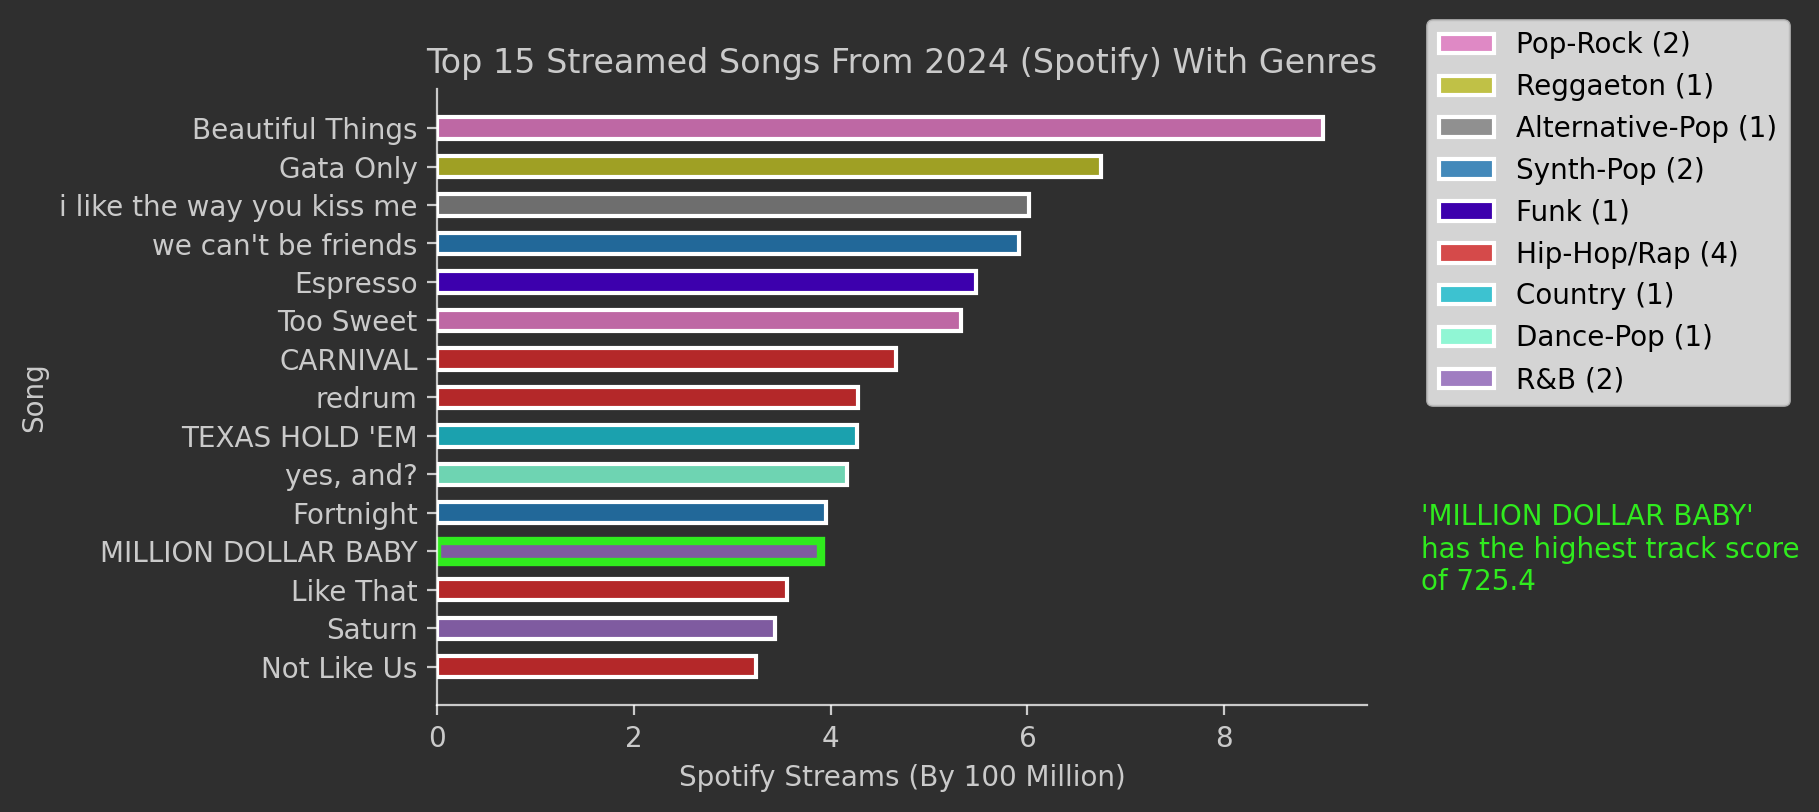

In [76]:
#Barplot for the Top 15 most streamed songs from 2024 on Spotify
fig, ax = plt.subplots(figsize=(6,4))
for i in range(len(top15_2024)):
    edge = '#ffffff'
    line_w = 1.5
    if top15_2024['Genre'].iloc[i] == 'Synth-Pop':
        clr = ('tab:blue', 0.8)
    elif top15_2024['Genre'].iloc[i] == 'Dancehall':
        clr = ('tab:orange', 0.8)
    elif top15_2024['Genre'].iloc[i] == 'Adult Contemporary':
        clr = ('tab:green', 0.8)
    elif top15_2024['Genre'].iloc[i] == 'Hip-Hop/Rap':
        clr = ('tab:red', 0.8)
    elif top15_2024['Genre'].iloc[i] == 'R&B':
        clr = ('tab:purple', 0.8)
    elif top15_2024['Genre'].iloc[i] == 'Electro-Pop':
        clr = ('tab:brown', 0.8)
    elif top15_2024['Genre'].iloc[i] == 'Pop-Rock':
        clr = ('tab:pink', 0.8)
    elif top15_2024['Genre'].iloc[i] == 'Alternative-Pop':
        clr = ('tab:gray', 0.8)
    elif top15_2024['Genre'].iloc[i] == 'Reggaeton':
        clr = ('tab:olive', 0.8)
    elif top15_2024['Genre'].iloc[i] == 'Country':
        clr = ('tab:cyan', 0.8)
    elif top15_2024['Genre'].iloc[i] == 'Dance-Pop':
        clr = ('aquamarine', 0.8)
    else:
        clr = '#3d00ad'
    if top15_2024['Track Score'].iloc[i] == top15_2024['Track Score'].max():
        edge = '#30eb1e'
        line_w = 3
    ax.barh(top15_2024['Track'].iloc[i], top15_2024['Spotify Streams'].iloc[i], 
            color = clr, label = top15_2024['Genre'].iloc[i], height = 0.55, edgecolor = edge, linewidth = line_w)
ax.invert_yaxis()

ax.set_yticklabels(['Beautiful Things', 'Gata Only', 'i like the way you kiss me', 
                    "we can't be friends", 'Espresso', 'Too Sweet', 'CARNIVAL', 'redrum', 
                    "TEXAS HOLD 'EM", 'yes, and?', 'Fortnight', 'MILLION DOLLAR BABY', 
                    'Like That', 'Saturn', 'Not Like Us'])
ax.set_xticklabels([0, 2, 4, 6, 8])

ax.set_title('Top 15 Streamed Songs From 2024 (Spotify) With Genres')
ax.set_ylabel('Song', color = ('#ffffff', 0.75))
ax.set_xlabel('Spotify Streams (By 100 Million)', color = ('#ffffff', 0.75))
ax.title.set_color(('#ffffff', 0.75))
ax.tick_params(axis = 'x', colors = ('#ffffff', 0.75))
ax.tick_params(axis = 'y', colors = ('#ffffff', 0.75))

ax.set_facecolor('#2f2f2f')
fig.set_facecolor('#2f2f2f')

hndls, lbls = plt.gca().get_legend_handles_labels()
by_lbl = dict(zip(lbls, hndls))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color(('#ffffff', 0.75))
ax.spines['bottom'].set_color(('#ffffff', 0.75))

ax.text(s = "'MILLION DOLLAR BABY'\n" + "has the highest track score\n" + "of 725.4", x = 1000000000, y = 12, color = ('#30eb1e'))

legend_labels = []
for i in range(len(counts_2024)):
    lbl = str(list(by_lbl.keys())[i])
    c = str(list(counts_2024.values())[i])
    legend_labels.append(lbl + " (" + c + ')')

plt.legend(by_lbl.values(), legend_labels, loc = 'center left', bbox_to_anchor = (1.05, 0.8))
plt.show()

In [77]:
columns_to_fill = ['Spotify Streams', 'YouTube Views', 'TikTok Views']
spotify[columns_to_fill] = spotify[columns_to_fill].fillna(spotify[columns_to_fill].median())

In [78]:
top_streamed_all = spotify[spotify['Spotify Streams'] > 2801110000]
songs_from_2024 = spotify[spotify['Release Date'].dt.year == 2024]
len(songs_from_2024)

top_streamed_2024 = songs_from_2024[songs_from_2024['Spotify Streams'] > 600000000]
len(top_streamed_2024)

20

In [79]:
artist_avg = spotify.groupby('Artist').agg({
    'Spotify Streams': 'mean',
    'YouTube Views': 'mean',
    'TikTok Views': 'mean',
    'Explicit Track': 'any'  # Check if any song by the artist is explicit
}).reset_index()

In [80]:
artist_avg_sorted = artist_avg.sort_values(by='Spotify Streams', ascending=False)
top_10_artists = artist_avg_sorted.head(10)
# top_10_artists

In [81]:
# Find the top artist in each category
top_spotify_artist = top_10_artists.loc[top_10_artists['Spotify Streams'].idxmax()]
top_youtube_artist = top_10_artists.loc[top_10_artists['YouTube Views'].idxmax()]
top_tiktok_artist = top_10_artists.loc[top_10_artists['TikTok Views'].idxmax()]

# Coordinates for annotation
youtube_x = top_youtube_artist['YouTube Views']
youtube_y = top_10_artists['Artist'].tolist().index(top_youtube_artist['Artist'])

In [82]:
songs_from_2024 = spotify[spotify['Release Date'].dt.year == 2024]
# Group by artist and calculate the average for each metric
artist_avg_2024 = songs_from_2024.groupby('Artist').agg({
    'Spotify Streams': 'mean',
    'YouTube Views': 'mean',
    'TikTok Views': 'mean',
    'Explicit Track': 'any'
}).reset_index()

In [83]:
artist_avg_2024_sorted = artist_avg_2024.sort_values(by='Spotify Streams', ascending=False).reset_index()
top_10_artists_2024 = artist_avg_2024_sorted.head(16)
top_10_artists_2024
top_10_2024 = top_10_artists_2024.drop([0,1,2,5,10,14]).reset_index(drop=True)
artist_avg_2024_sorted.head(40)

top_10_2024 = artist_avg_2024_sorted.loc[[8, 11, 13, 15, 16, 18, 19, 20, 21, 23]]

In [84]:
print('amount of artists', len(spotify.Artist.unique()))
print('ammount of songs', len(spotify.Track.unique()))
print('max streams', spotify['Spotify Streams'].max())
print('min streams', spotify['Spotify Streams'].min())
# print('Most streamed song', spotify.loc[spotify['Spotify Streams'].idxmax()])
# print('least streamed song', spotify.loc[spotify['Spotify Streams'].idxmin()])

amount of artists 2000
ammount of songs 4370
max streams 4281468720.0
min streams 1071.0


In [85]:
top_50 = spotify.head(50)
max(top_50['Spotify Streams'])


3301814535.0

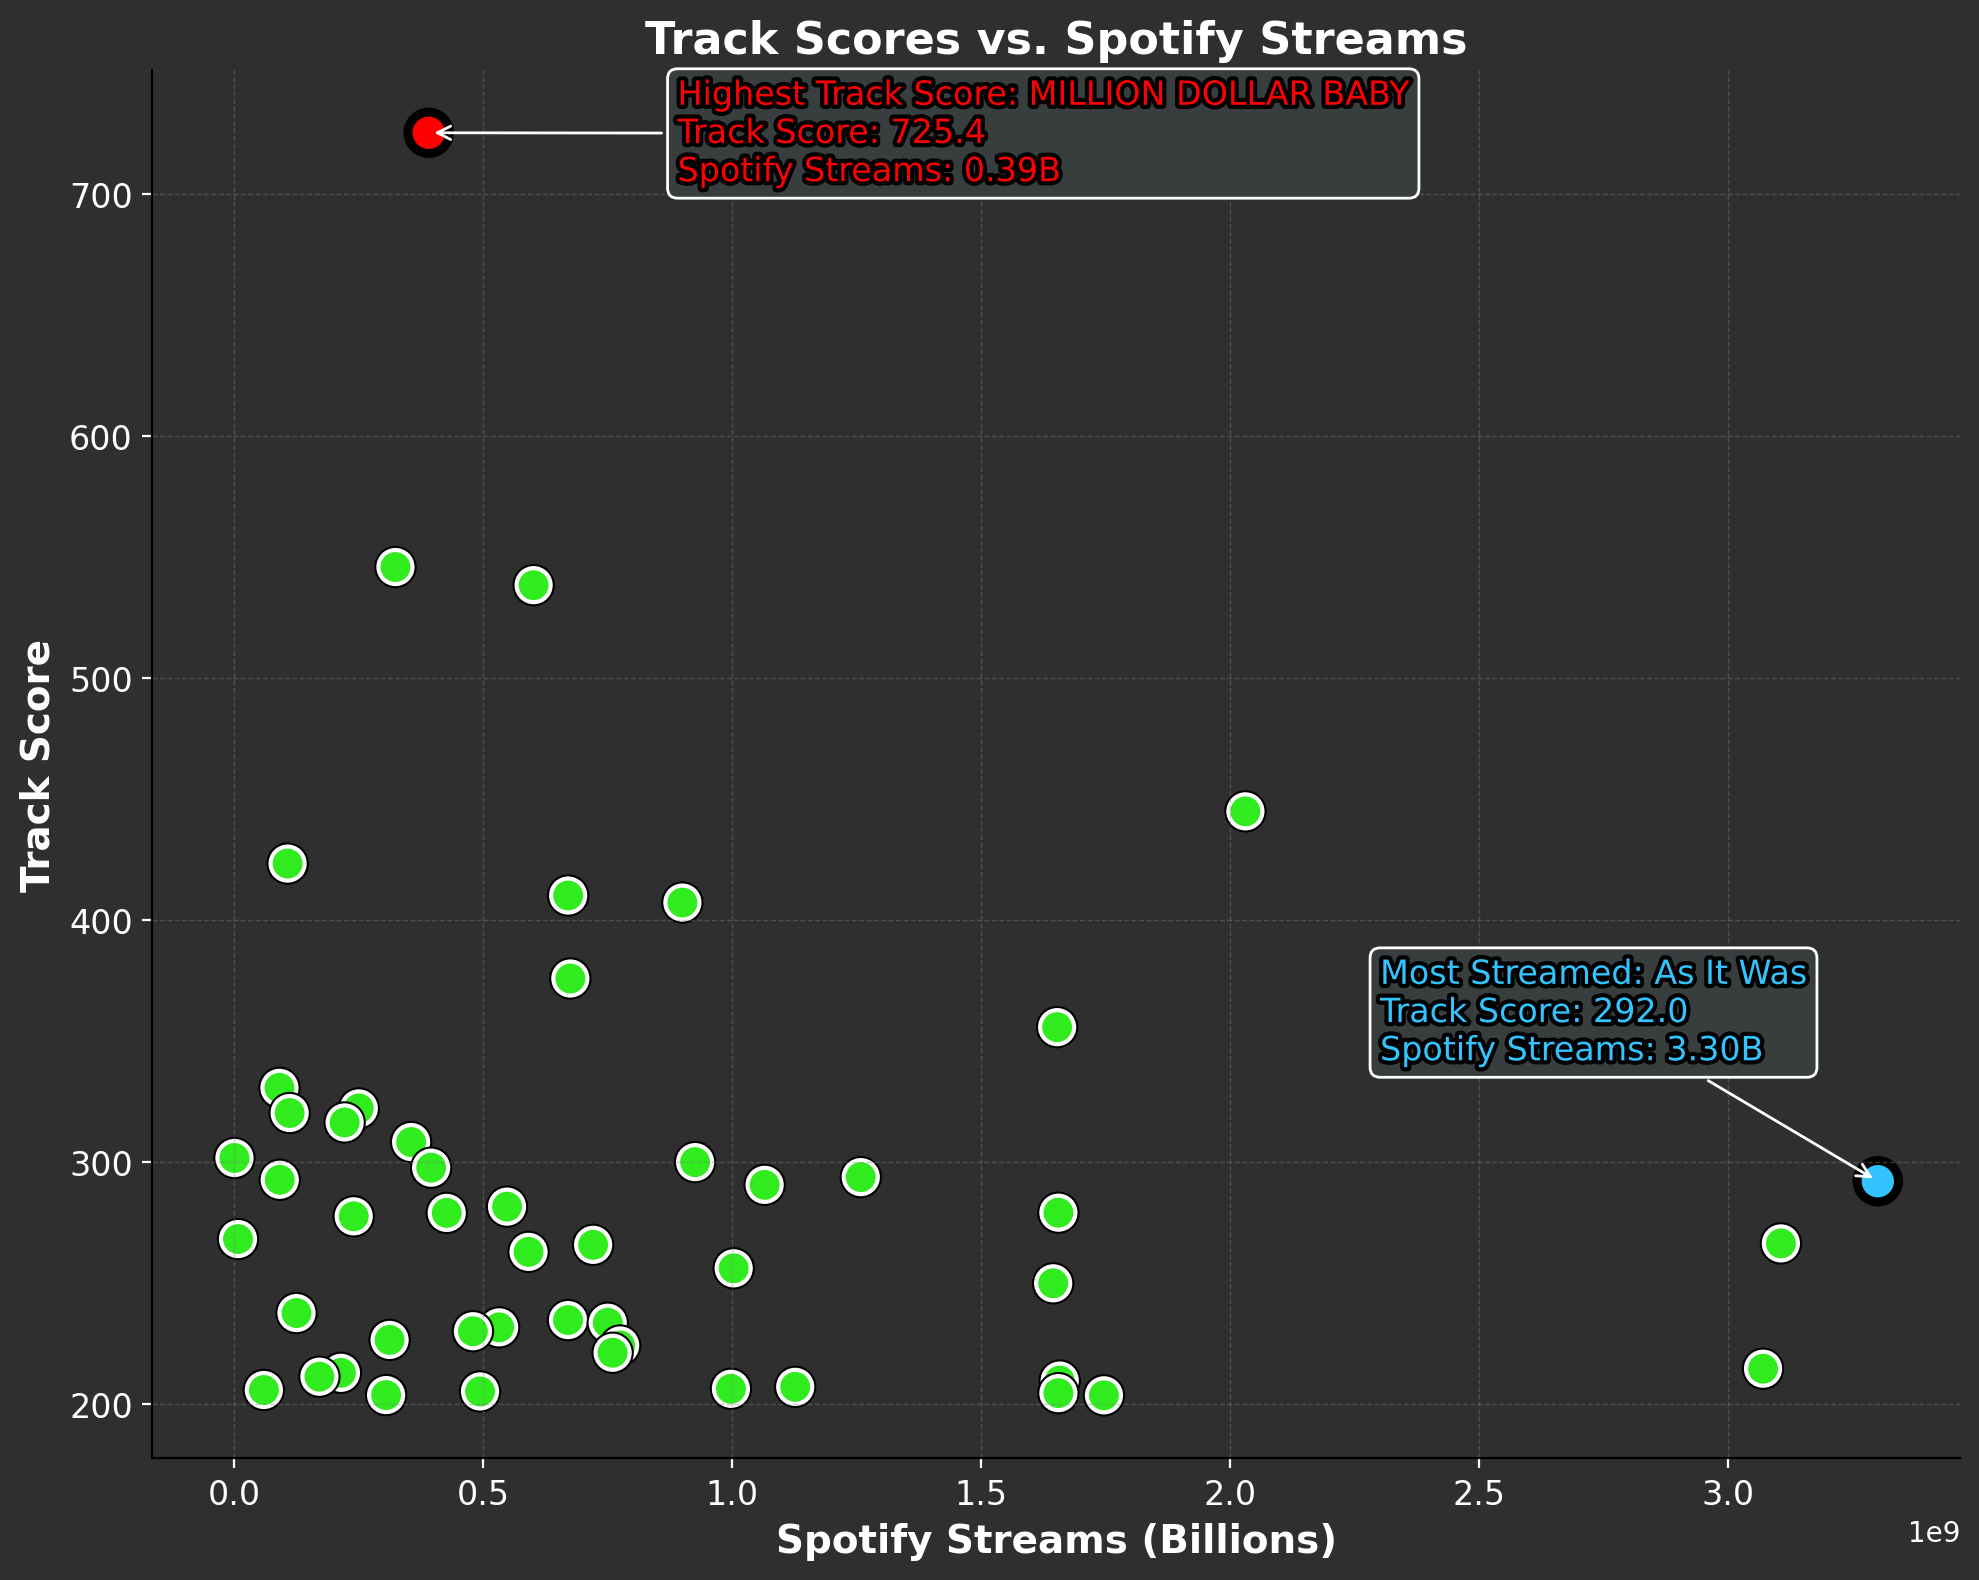

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as pe


# Import path effects if not already imported
import matplotlib.patheffects as pe

# Highlight settings
highlight_color = 'r'  # Color for the first highlighted point
highlight_color2 = '#33c4ff'  # Color for the second highlighted point
highlight_index = 0  # Index of the first point to highlight
highlight_index2 = 19  # Index of the second point to highlight

# Plot setup
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('#2f2f2f')  # Dark background color
ax.set_facecolor('#2f2f2f')  # Slightly lighter dark background for axes


# Scatter plot
y = top_50['Track Score']
x = top_50['Spotify Streams']
scatter = ax.scatter(x, y, color='#30eb1e', s=150, edgecolor='white', linewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground='black')])

# Highlight the first point
ax.scatter(x[highlight_index], y[highlight_index], color=highlight_color, s=200, edgecolor='black', linewidth=2.5, path_effects=[pe.withStroke(linewidth=4, foreground='black')])

# Add annotation for the first highlighted point
ax.annotate(
    f"Highest Track Score: {top_50['Track'][highlight_index]}\n"
    f"Track Score: {y[highlight_index]}\n"
    f"Spotify Streams: {x[highlight_index]/1e9:.2f}B",
    xy=(x[highlight_index], y[highlight_index]),
    xytext=(x[highlight_index] + 0.5e9, y[highlight_index] - 20),  # Move the text to the right
    arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'),  # White arrows
    fontsize=12,
    color=highlight_color,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='#383d3d'),
    path_effects=[pe.withStroke(linewidth=3, foreground='black')]
)

# Highlight the second point
ax.scatter(x[highlight_index2], y[highlight_index2], color=highlight_color2, s=200, edgecolor='black', linewidth=2.5, path_effects=[pe.withStroke(linewidth=4, foreground='black')])

# Add annotation for the second highlighted point
ax.annotate(
    f"Most Streamed: {top_50['Track'][highlight_index2]}\n"
    f"Track Score: {y[highlight_index2]}\n"
    f"Spotify Streams: {x[highlight_index2]/1e9:.2f}B",
    xy=(x[highlight_index2], y[highlight_index2]),
    xytext=(x[highlight_index2] - 1e9, y[highlight_index2] + 50),  # Move the text to the right and slightly lower
    arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'),  # White arrows
    fontsize=12,
    color=highlight_color2,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='#383d3d'),
    path_effects=[pe.withStroke(linewidth=3, foreground='black')]
)

# Axis labels
ax.set_xlabel('Spotify Streams (Billions)', fontsize=14, color='white', fontweight='bold')
ax.set_ylabel('Track Score', fontsize=14, color='white', fontweight='bold')

# Title
ax.set_title('Track Scores vs. Spotify Streams', fontsize=16, color='white', fontweight='bold')

# Customize grid
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

# Customize ticks
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

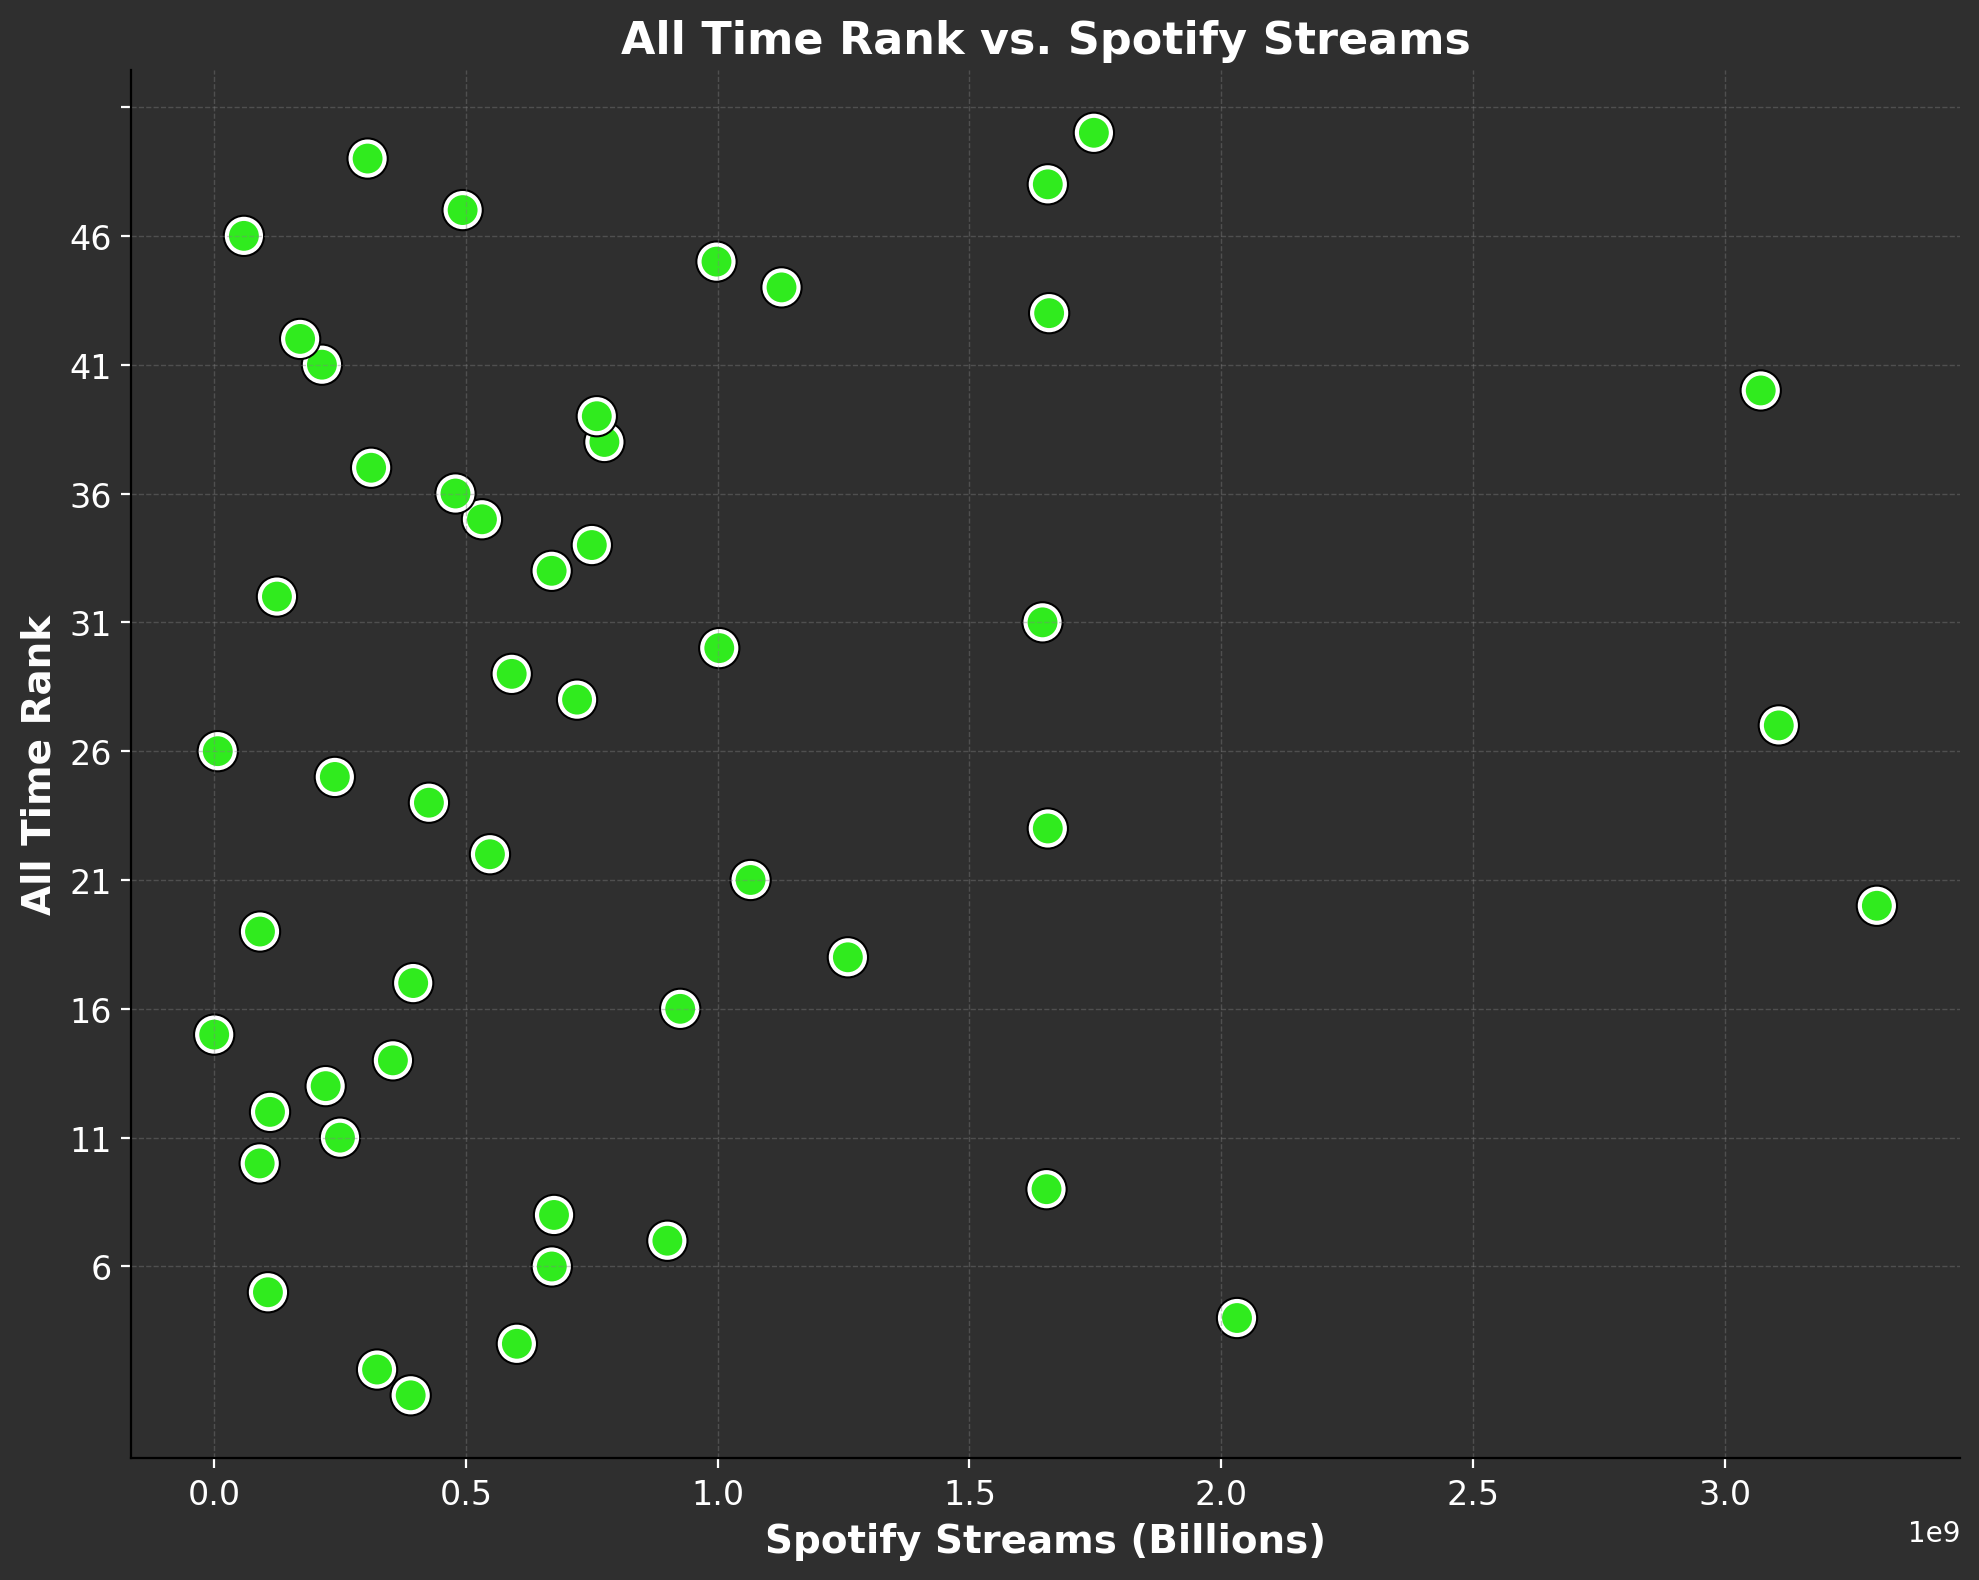

In [87]:
#This plot is not one of our 6 main plots
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# Plot setup
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('#2f2f2f')  # Dark background color
ax.set_facecolor('#2f2f2f')  # Slightly lighter dark background for axes

# Scatter plot
y = top_50['All Time Rank']
x = top_50['Spotify Streams']
scatter = ax.scatter(x, y, color='#30eb1e', s=150, edgecolor='white', linewidth=1.5, path_effects=[pe.withStroke(linewidth=3, foreground='black')])

# Axis labels
ax.set_xlabel('Spotify Streams (Billions)', fontsize=14, color='white', fontweight='bold')
ax.set_ylabel('All Time Rank', fontsize=14, color='white', fontweight='bold')

# Title
ax.set_title('All Time Rank vs. Spotify Streams', fontsize=16, color='white', fontweight='bold')

# Customize grid
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.4)

# Customize ticks
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

# Set y-ticks from 5 to 50 with increments of 5
ax.set_yticks(range(5, 51, 5))

# Hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


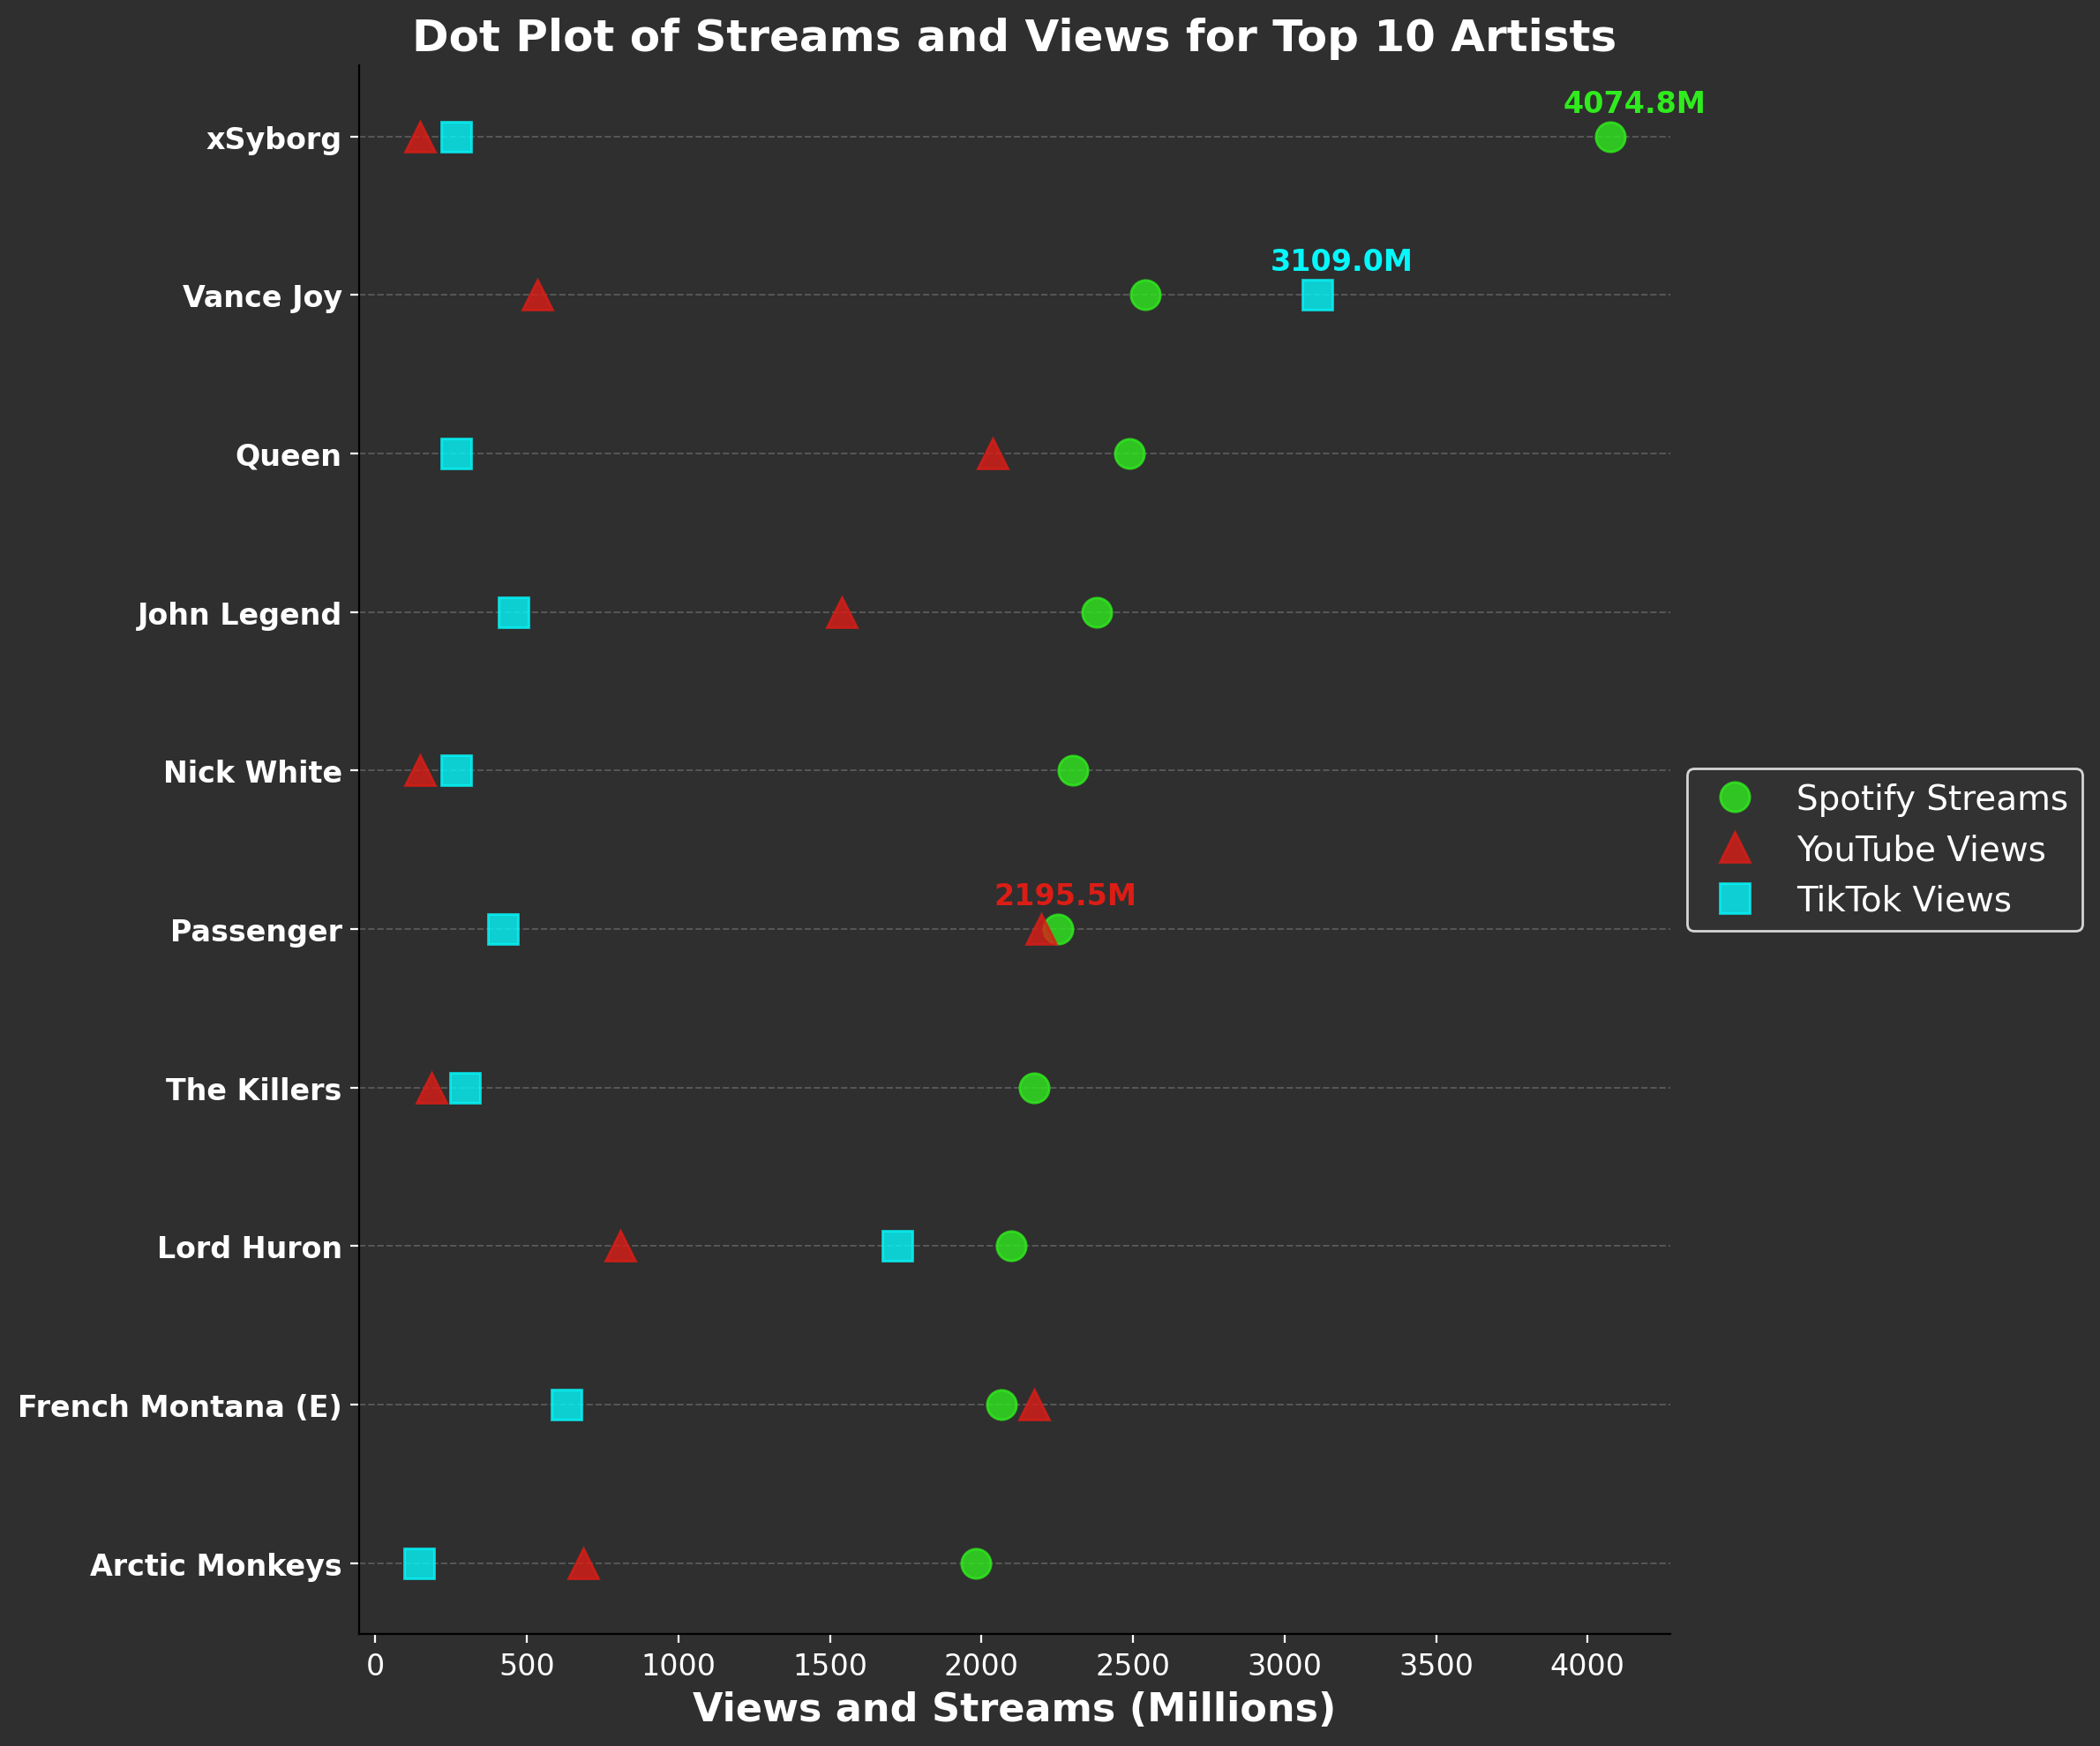

In [88]:


# Define colors
colors = ['#30eb1e', '#db1d16', '#05f8fc']


# Data preparation
spotify_streams = top_10_artists['Spotify Streams'] / 1e6  # Convert to millions
youtube_views = top_10_artists['YouTube Views'] / 1e6
tiktok_views = top_10_artists['TikTok Views'] / 1e6

# Define positions for each artist
y_positions = np.arange(len(top_10_artists['Artist']))
artist_labels = [
    f"{artist} (E)" if is_explicit else artist
    for artist, is_explicit in zip(top_10_artists['Artist'], top_10_artists['Explicit Track'])
]

# Reverse the order to have the highest values at the top
sorted_indices = np.argsort(spotify_streams)[::-1]  # Sort indices in descending order

# Apply sorting
top_10_artists = top_10_artists.iloc[sorted_indices].reset_index(drop=True)
spotify_streams = top_10_artists['Spotify Streams'] / 1e6
youtube_views = top_10_artists['YouTube Views'] / 1e6
tiktok_views = top_10_artists['TikTok Views'] / 1e6
artist_labels = [
    f"{artist} (E)" if is_explicit else artist
    for artist, is_explicit in zip(top_10_artists['Artist'], top_10_artists['Explicit Track'])
]
y_positions = np.arange(len(artist_labels))
y_positions = y_positions[::-1]

# Create dot plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each platform with different styles
ax.plot(spotify_streams, y_positions, 'o', color=colors[0], markersize=12, label='Spotify Streams', alpha=0.8)
ax.plot(youtube_views, y_positions, '^', color=colors[1], markersize=12, label='YouTube Views', alpha=0.8)
ax.plot(tiktok_views, y_positions, 's', color=colors[2], markersize=12, label='TikTok Views', alpha=0.8)

# Annotate the top streams
def annotate_top_streams(ax, data, y_positions, label, color):
    top_idx = np.argmax(data)
    ax.annotate(f'{data[top_idx]:.1f}M', (data[top_idx], y_positions[top_idx]), 
                textcoords="offset points", xytext=(10, 10), ha='center', 
                fontsize=12, color=color, fontweight='bold')

annotate_top_streams(ax, spotify_streams, y_positions, 'Spotify Streams', colors[0])
annotate_top_streams(ax, youtube_views, y_positions, 'YouTube Views', colors[1])
annotate_top_streams(ax, tiktok_views, y_positions, 'TikTok Views', colors[2])

# Set y-ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels(artist_labels, fontsize=14, color='white', fontweight='bold')

# Add labels and title with custom font and color
ax.set_xlabel('Views and Streams (Millions)', fontsize=16, color='white', fontweight='bold')
ax.set_title('Dot Plot of Streams and Views for Top 10 Artists', fontsize=18, color='white', fontweight='bold')

# Change all other text to white
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

# Set axis face color to a dark theme
ax.set_facecolor('#2f2f2f')
fig.patch.set_facecolor('#2f2f2f')

# Add legend with custom style
legend = ax.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, facecolor='#333333', edgecolor='white', labelcolor='white')
for text in legend.get_texts():
    text.set_color("white")

# Add a subtle grid with transparency
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.7, alpha=0.5)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()

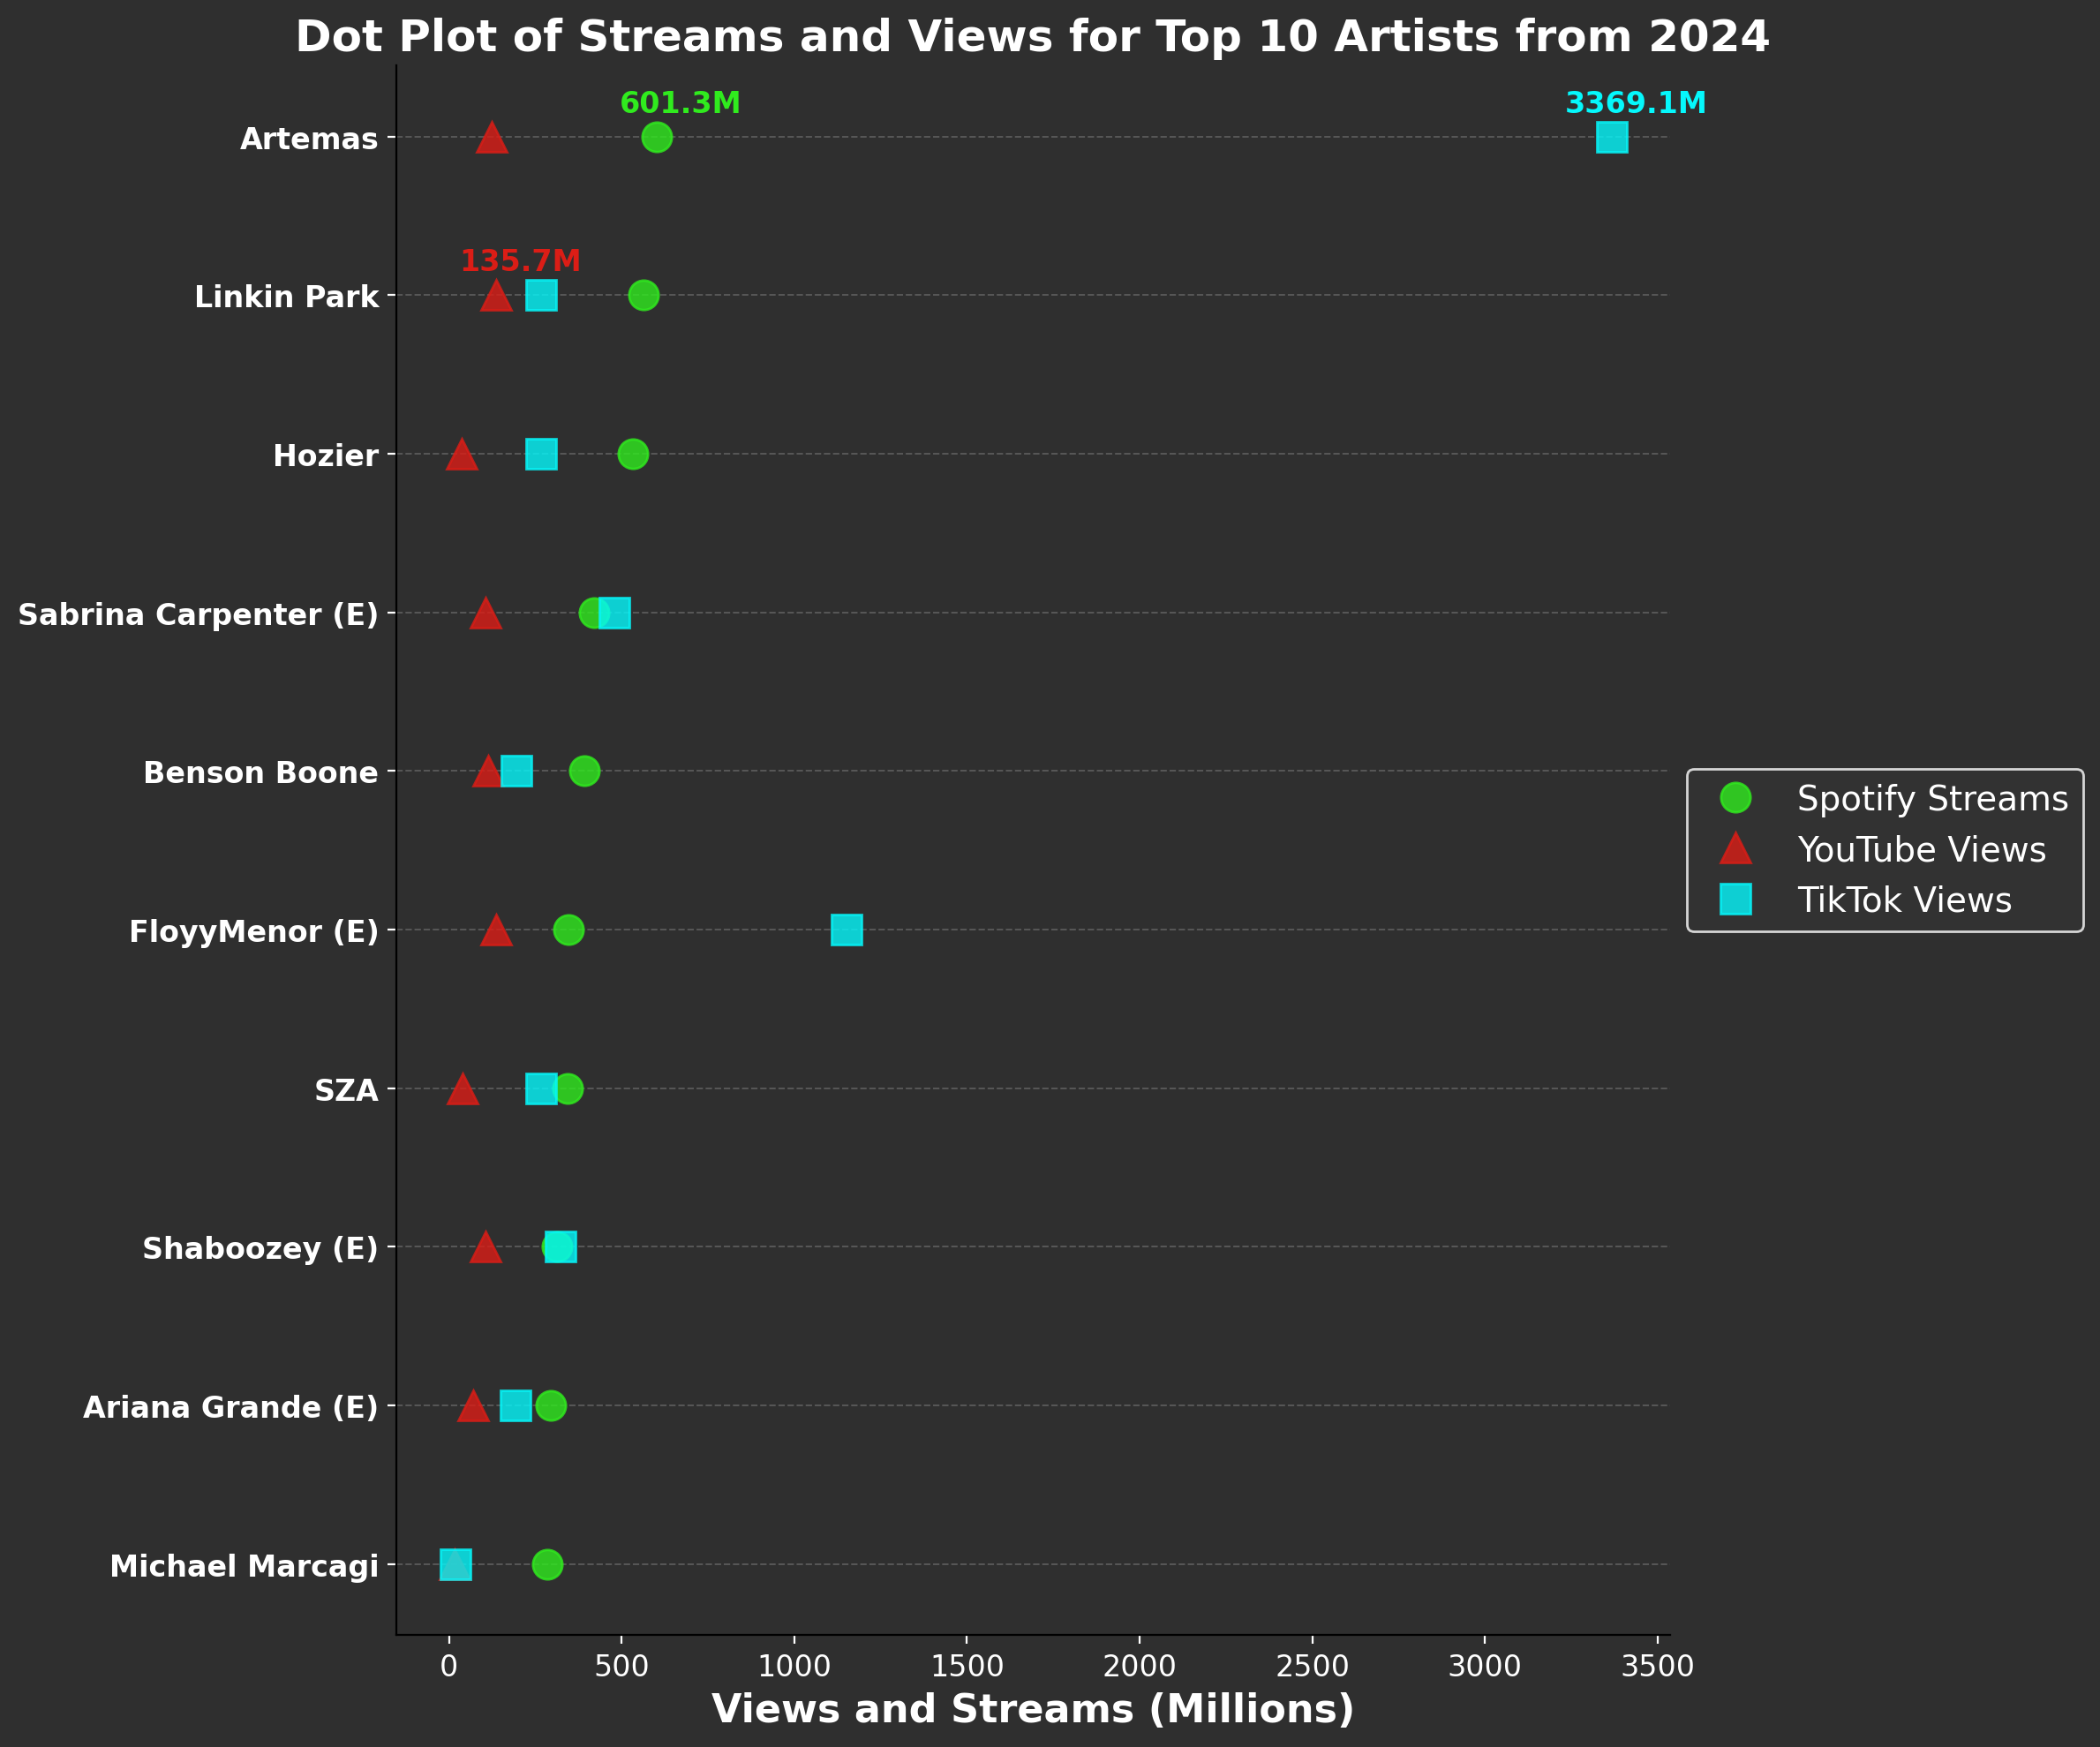

In [89]:


# Define colors
colors = ['#30eb1e', '#db1d16', '#05f8fc']


# Data preparation
spotify_streams = top_10_2024['Spotify Streams'] / 1e6  # Convert to millions
youtube_views = top_10_2024['YouTube Views'] / 1e6
tiktok_views = top_10_2024['TikTok Views'] / 1e6

# Define positions for each artist
y_positions = np.arange(len(top_10_2024['Artist']))
artist_labels = [
    f"{artist} (E)" if is_explicit else artist
    for artist, is_explicit in zip(top_10_2024['Artist'], top_10_2024['Explicit Track'])
]

# Reverse the order to have the highest values at the top
sorted_indices = np.argsort(spotify_streams)[::-1]  # Sort indices in descending order

# Apply sorting
top_10_2024 = top_10_2024.iloc[sorted_indices].reset_index(drop=True)
spotify_streams = top_10_2024['Spotify Streams'] / 1e6
youtube_views = top_10_2024['YouTube Views'] / 1e6
tiktok_views = top_10_2024['TikTok Views'] / 1e6
artist_labels = [
    f"{artist} (E)" if is_explicit else artist
    for artist, is_explicit in zip(top_10_2024['Artist'], top_10_2024['Explicit Track'])
]
y_positions = np.arange(len(artist_labels))
y_positions = y_positions[::-1]

# Create dot plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot each platform with different styles
ax.plot(spotify_streams, y_positions, 'o', color=colors[0], markersize=12, label='Spotify Streams', alpha=0.8)
ax.plot(youtube_views, y_positions, '^', color=colors[1], markersize=12, label='YouTube Views', alpha=0.8)
ax.plot(tiktok_views, y_positions, 's', color=colors[2], markersize=12, label='TikTok Views', alpha=0.8)

# Annotate the top streams
def annotate_top_streams(ax, data, y_positions, label, color):
    top_idx = np.argmax(data)
    ax.annotate(f'{data[top_idx]:.1f}M', (data[top_idx], y_positions[top_idx]), 
                textcoords="offset points", xytext=(10, 10), ha='center', 
                fontsize=12, color=color, fontweight='bold')

annotate_top_streams(ax, spotify_streams, y_positions, 'Spotify Streams', colors[0])
annotate_top_streams(ax, youtube_views, y_positions, 'YouTube Views', colors[1])
annotate_top_streams(ax, tiktok_views, y_positions, 'TikTok Views', colors[2])

# Set y-ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels(artist_labels, fontsize=14, color='white', fontweight='bold')

# Add labels and title with custom font and color
ax.set_xlabel('Views and Streams (Millions)', fontsize=16, color='white', fontweight='bold')
ax.set_title('Dot Plot of Streams and Views for Top 10 Artists from 2024', fontsize=18, color='white', fontweight='bold')

# Change all other text to white
ax.tick_params(axis='x', colors='white', labelsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

# Set axis face color to a dark theme
ax.set_facecolor('#2f2f2f')
fig.patch.set_facecolor('#2f2f2f')

# Add legend with custom style
legend = ax.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, facecolor='#333333', edgecolor='white', labelcolor='white')
for text in legend.get_texts():
    text.set_color("white")

# Add a subtle grid with transparency
ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.7, alpha=0.5)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show plot
plt.tight_layout()
plt.show()

In [90]:
# Impute missing values using the median for numeric columns
spotify_df = spotify.copy()

# Apply median imputation for numeric columns
spotify_df[numeric_columns] = spotify_df[numeric_columns].fillna(spotify_df[numeric_columns].median())

# Check if there are any remaining missing values in the dataset
remaining_missing_values = spotify_df.isnull().sum()

remaining_missing_values

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                  0
Spotify Playlist Count           0
Spotify Playlist Reach           0
Spotify Popularity             804
YouTube Views                    0
YouTube Likes                    0
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                     0
YouTube Playlist Reach           0
Apple Music Playlist Count     561
AirPlay Spins                    0
SiriusXM Spins                   0
Deezer Playlist Count            0
Deezer Playlist Reach            0
Amazon Playlist Count            0
Pandora Streams                  0
Pandora Track Stations           0
Soundcloud Streams               0
Shazam Counts                    0
TIDAL Popularity              4600
Explicit Track      

In [91]:
# Select the top 20 streamed songs based on Spotify Streams
top_20_songs = spotify_df.sort_values(by='Spotify Streams', ascending=False).head(20)

# Select the top 20 streamed songs from 2024
top_20_songs_2024 = spotify_df[spotify_df['Release Date'].dt.year == 2024].sort_values(by='Spotify Streams', ascending=False).head(20)

In [92]:
#These 3 plots are not part of our 6 main plots
# Function to create a combined horizontal bar plot for two platforms
def create_combined_horizontal_bar_plot(data1, data2, labels, platform1, platform2, color1, color2, title):
    plt.figure(figsize=(12, 10))
    y_pos = np.arange(len(labels))

    # Create horizontal bars
    bars1 = plt.barh(y_pos - 0.2, data1, height=0.4, label=platform1, color=color1, edgecolor='black')
    bars2 = plt.barh(y_pos + 0.2, data2, height=0.4, label=platform2, color=color2, edgecolor='black')

    # Add text labels
    for bar1, bar2 in zip(bars1, bars2):
        width1 = bar1.get_width()
        width2 = bar2.get_width()
        plt.text(width1 + 1e6, bar1.get_y() + bar1.get_height()/2, f'{width1/1e6:.1f} mil', 
                 va='center', ha='left', fontsize=10, color='white')
        plt.text(width2 + 1e6, bar2.get_y() + bar2.get_height()/2, f'{width2/1e6:.1f} mil', 
                 va='center', ha='left', fontsize=10, color='white')

    # Labels and title
    plt.yticks(y_pos, labels, color='white')
    plt.xlabel('Streams/Views Count', color='white')
    plt.title(title, color='white')
    plt.gca().set_facecolor('#2b2b2b')
    plt.gcf().set_facecolor('#2b2b2b')
    plt.xticks(color='white')
    plt.legend(loc='upper right', facecolor='#2b2b2b', framealpha=0.3)
    plt.tight_layout()
    plt.show()

# Labels for the tracks
labels = top_20_songs['Track']

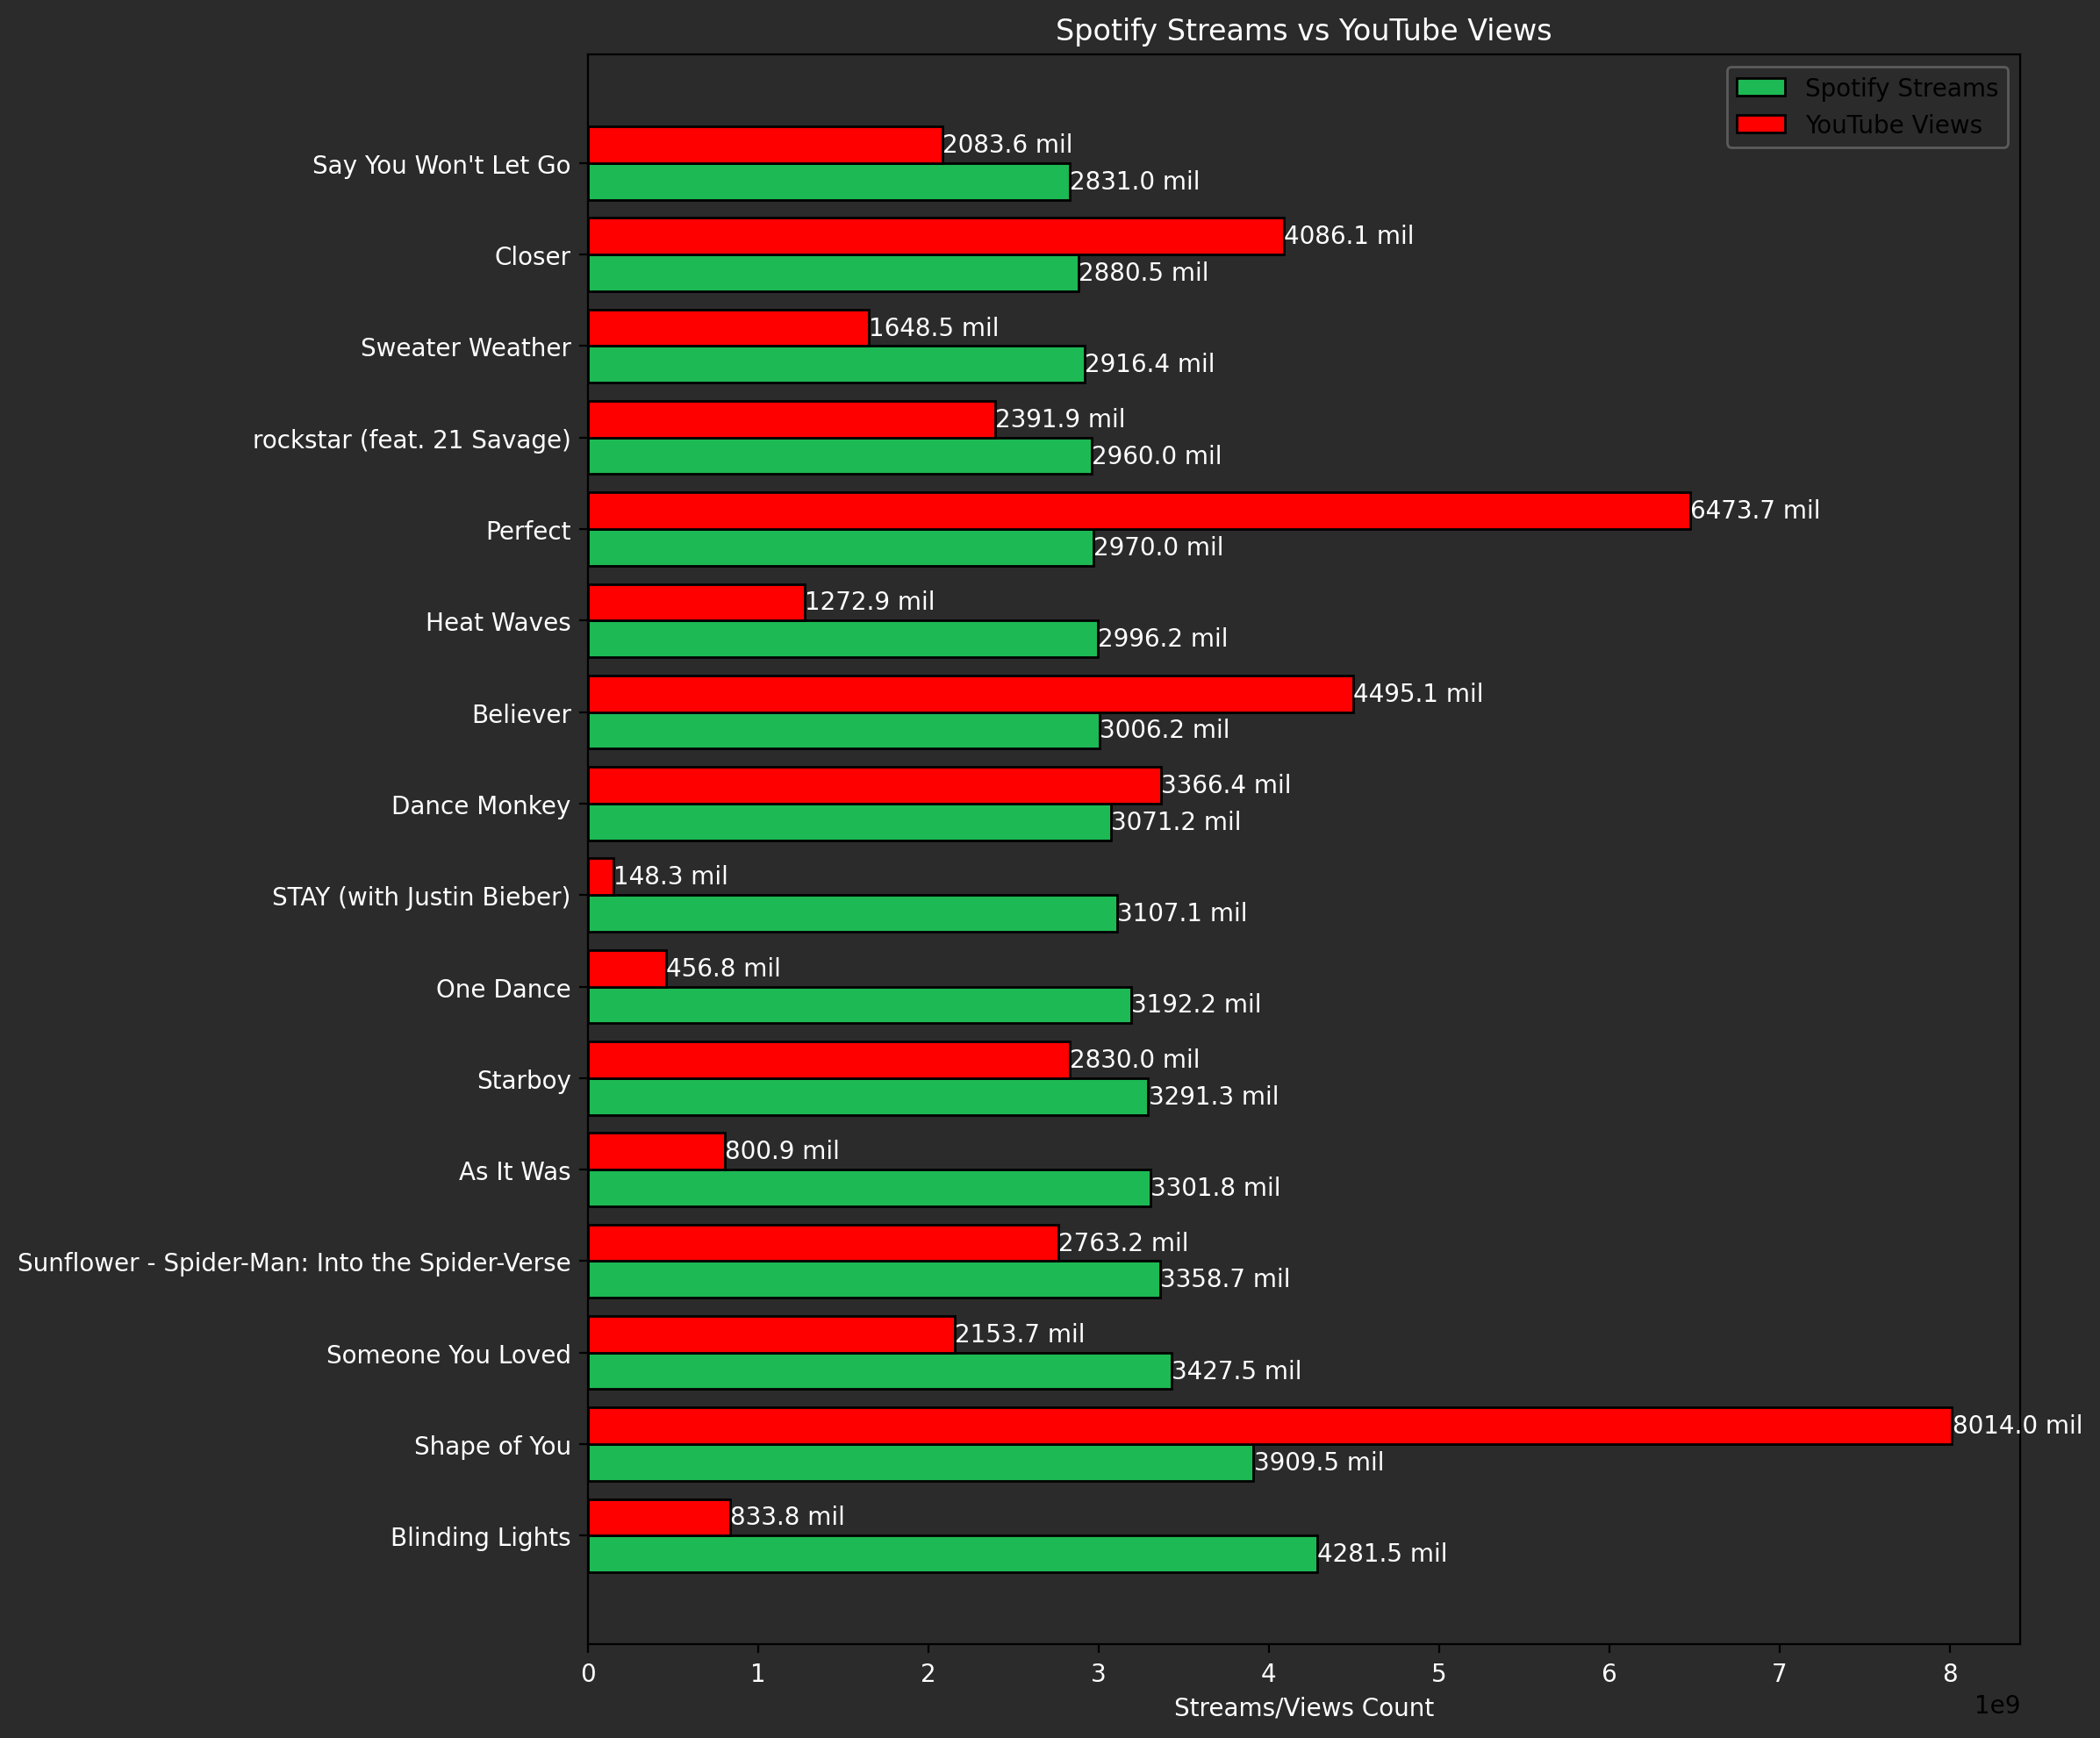

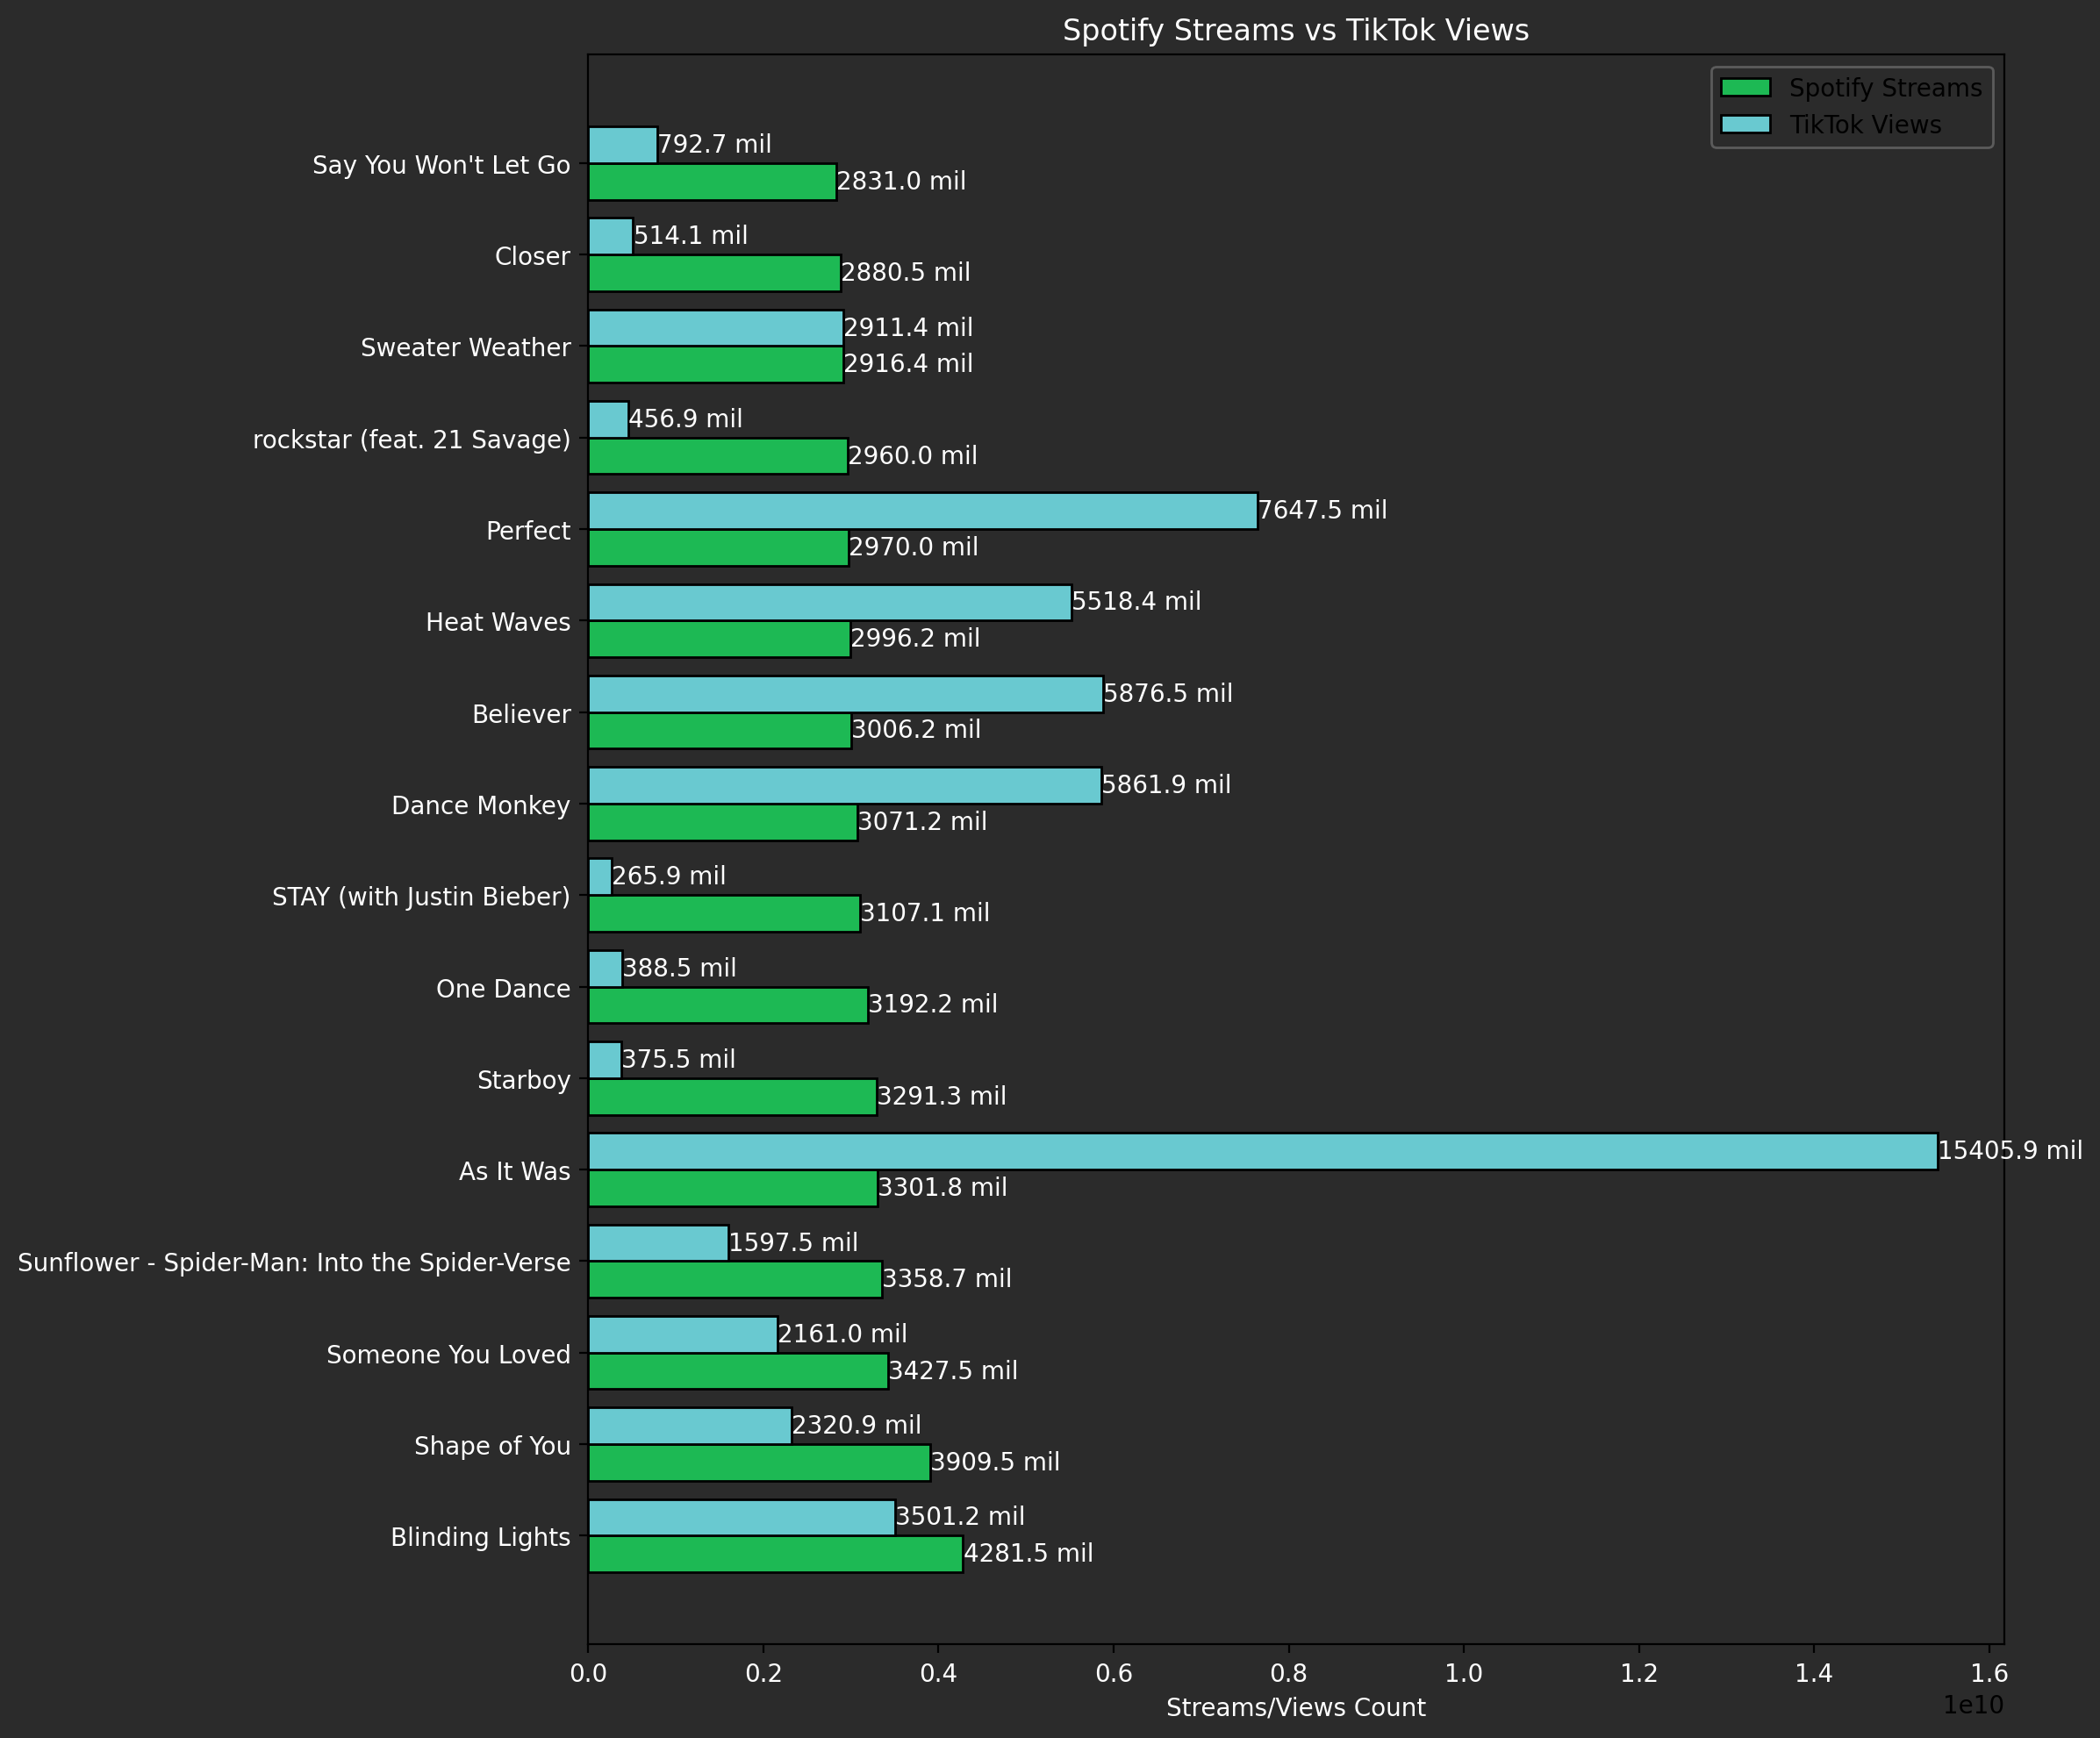

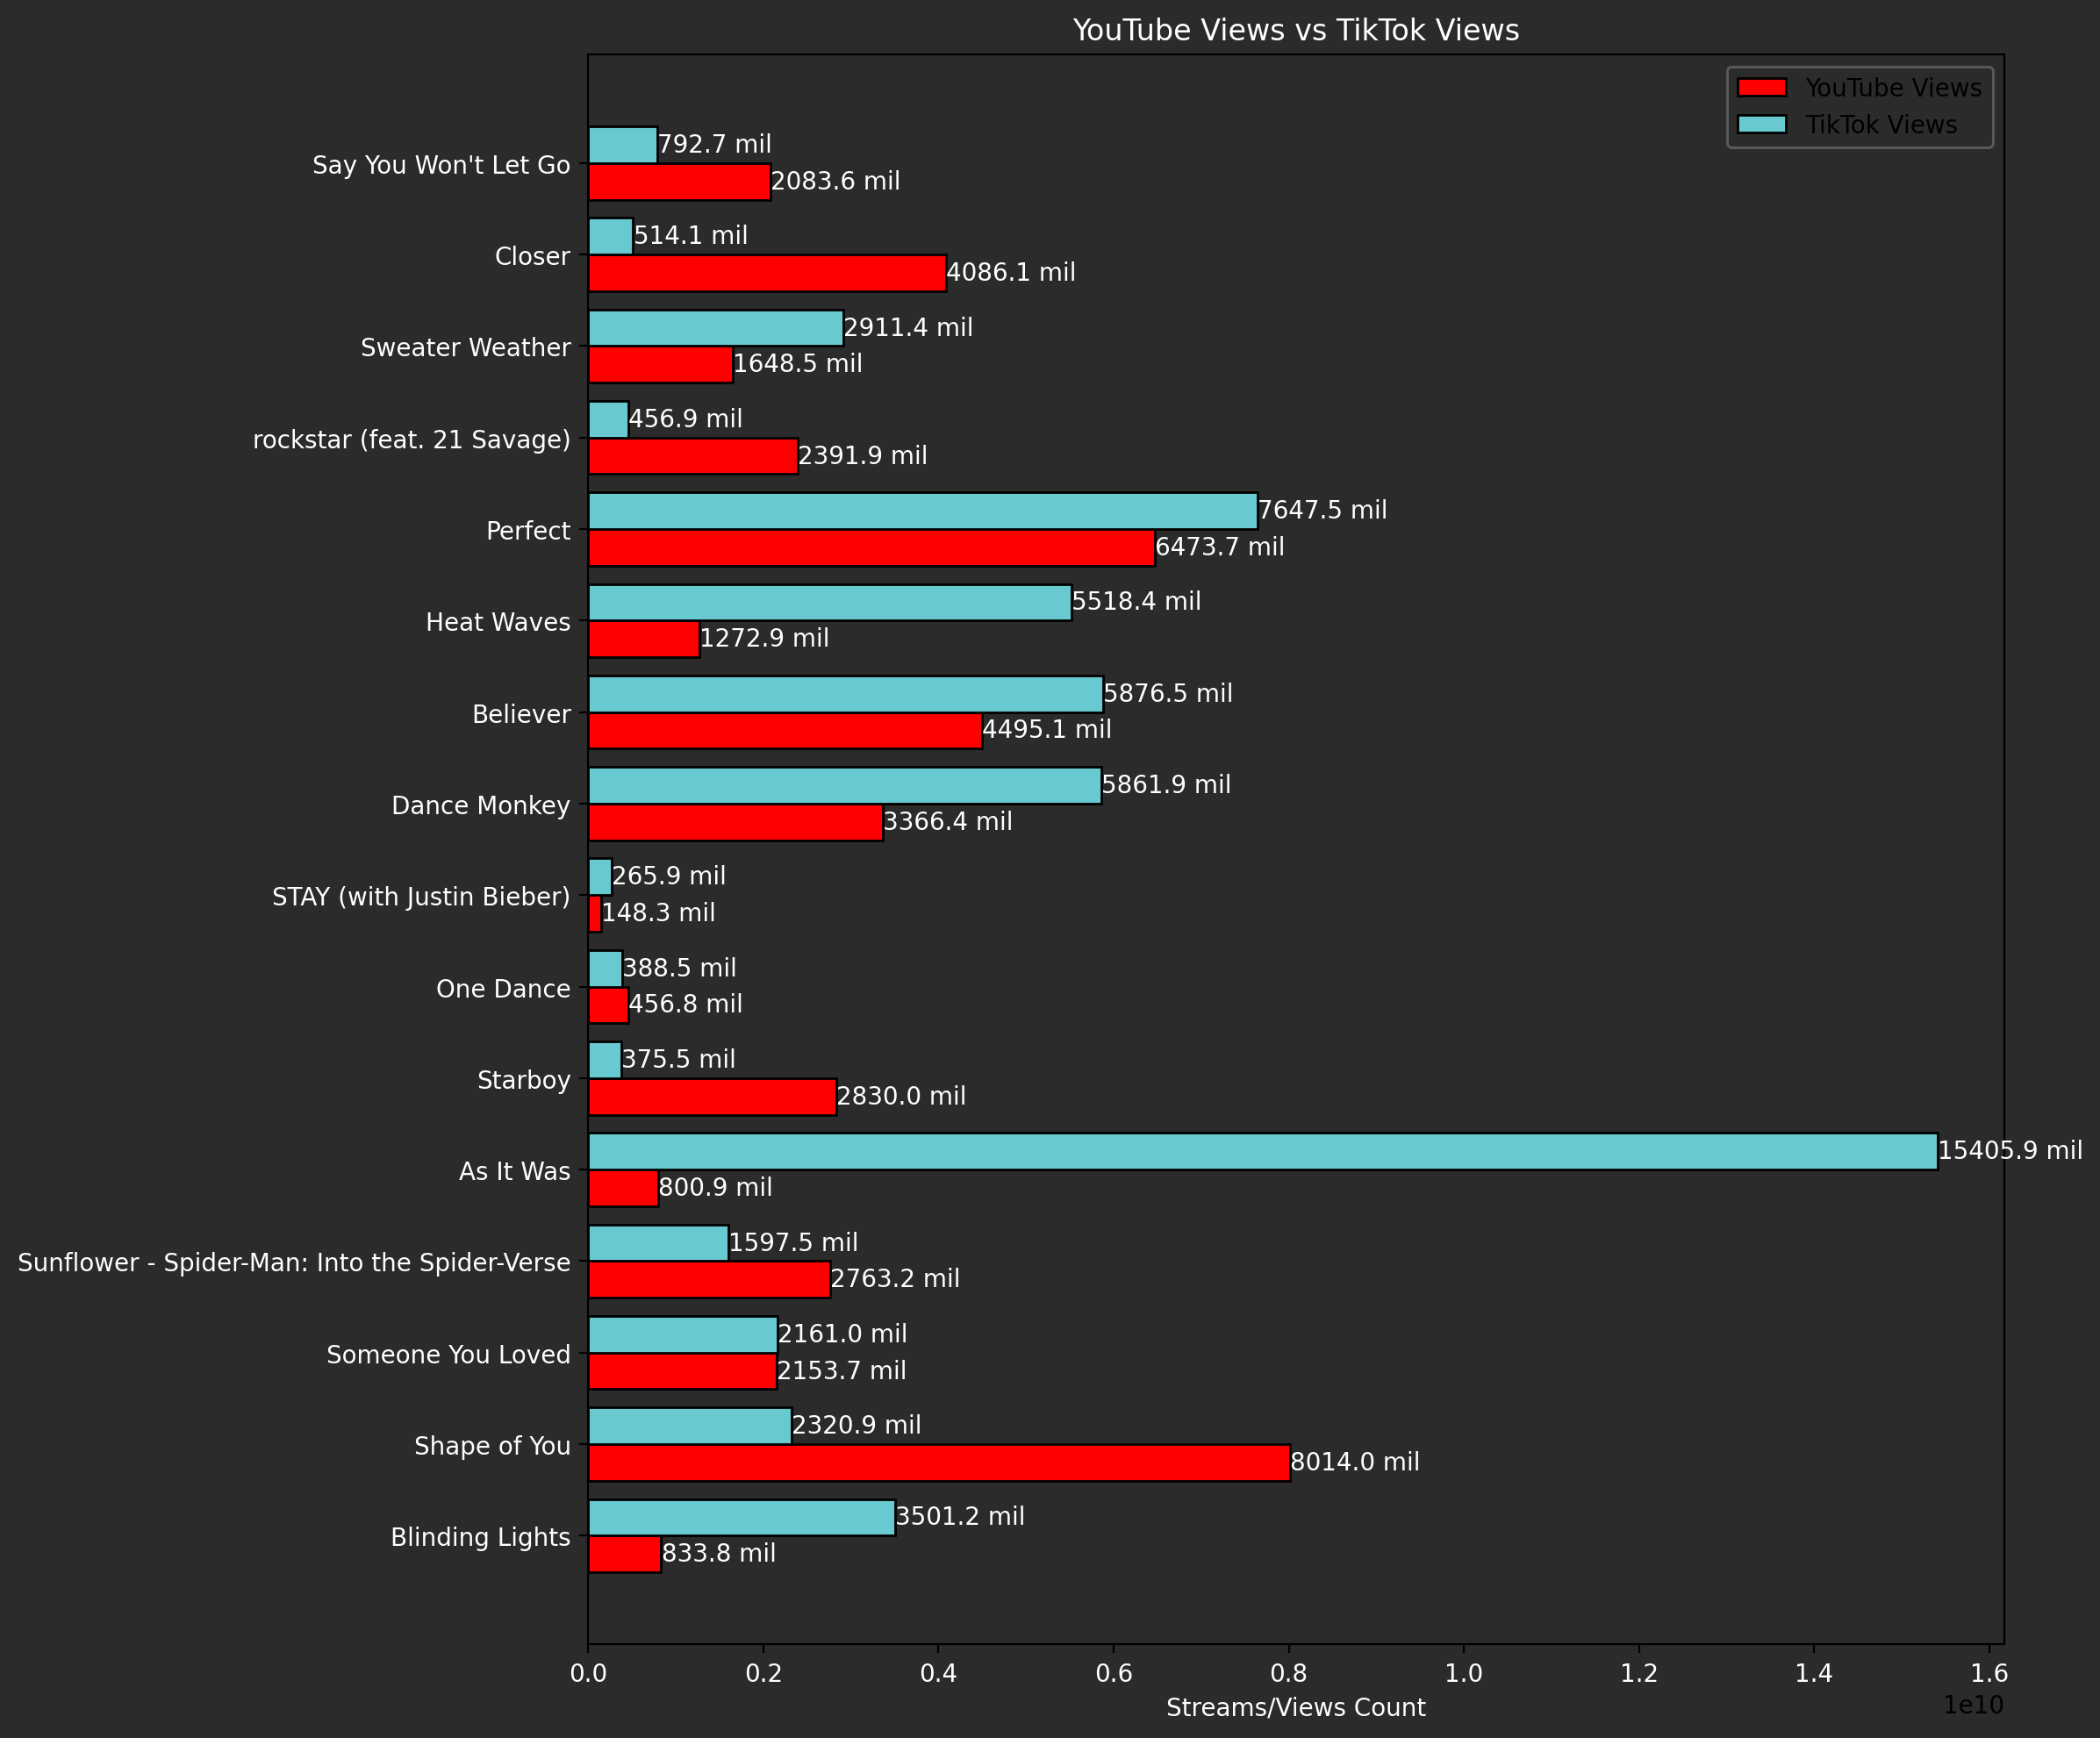

In [93]:
# Remove duplicates based on the 'Track' name while keeping the first occurrence
top_20_songs_unique = top_20_songs.drop_duplicates(subset='Track', keep='first')

# Labels for the unique tracks
unique_labels = top_20_songs_unique['Track']

# Plot 1: Spotify Streams vs YouTube Views (Unique Tracks)
create_combined_horizontal_bar_plot(top_20_songs_unique['Spotify Streams'], top_20_songs_unique['YouTube Views'], 
                                    unique_labels, 'Spotify Streams', 'YouTube Views', 
                                    '#1DB954', '#FF0000', 'Spotify Streams vs YouTube Views')

# Plot 2: Spotify Streams vs TikTok Views (Unique Tracks)
create_combined_horizontal_bar_plot(top_20_songs_unique['Spotify Streams'], top_20_songs_unique['TikTok Views'], 
                                    unique_labels, 'Spotify Streams', 'TikTok Views', 
                                    '#1DB954', '#69C9D0', 'Spotify Streams vs TikTok Views')

# Plot 3: YouTube Views vs TikTok Views (Unique Tracks)
create_combined_horizontal_bar_plot(top_20_songs_unique['YouTube Views'], top_20_songs_unique['TikTok Views'], 
                                    unique_labels, 'YouTube Views', 'TikTok Views', 
                                    '#FF0000', '#69C9D0', 'YouTube Views vs TikTok Views')

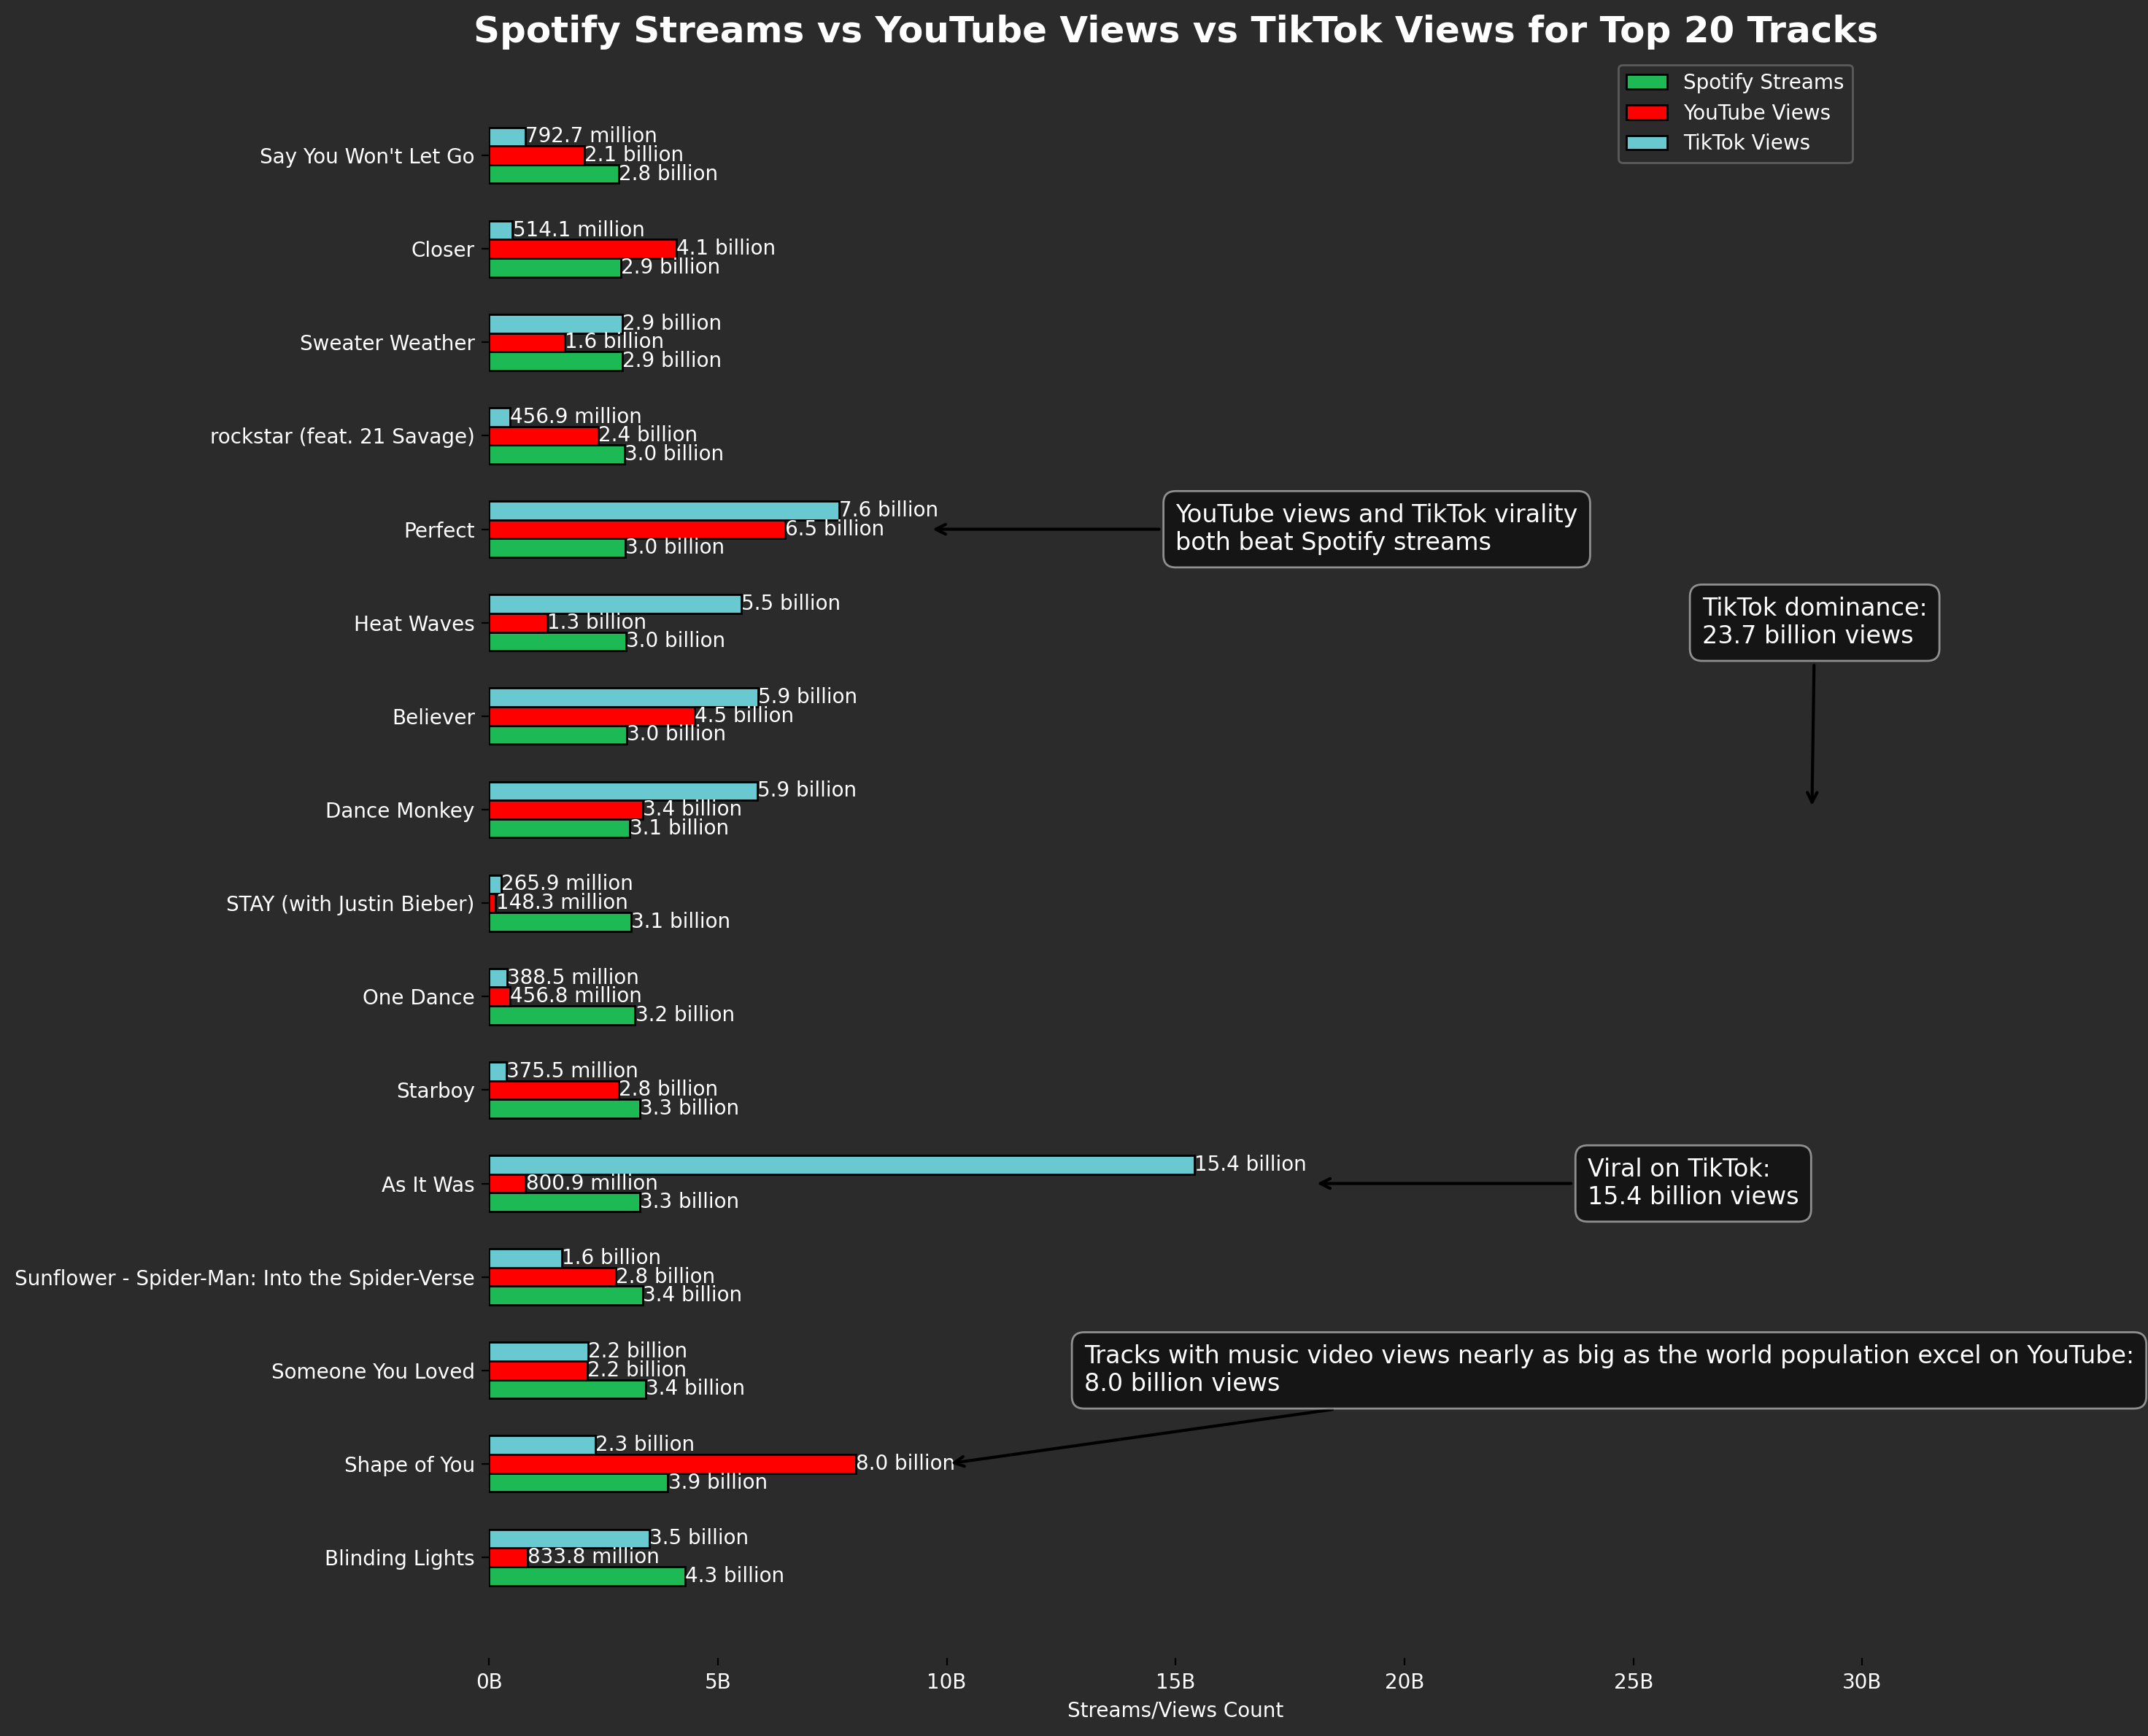

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Load the logos
#spotify_logo = mpimg.imread('/Users/yonathanamare/Downloads/Spotify_logo_with_text.svg.png')
#youtube_logo = mpimg.imread('/Users/yonathanamare/Downloads/81df95254429d24f564f57bbc27d4256.png')
#tiktok_logo = mpimg.imread('/Users/yonathanamare/Downloads/TikTok_logo.svg.png')

# Labels for the unique tracks
labels = top_20_songs_unique['Track']

# Create a combined horizontal bar plot for Spotify Streams, YouTube Views, and TikTok Views
plt.figure(figsize=(14, 12))
y_pos = np.arange(len(labels))

# Plot settings
bar_width = 0.2

# Create horizontal bars for each platform
bars_spotify = plt.barh(y_pos - bar_width, top_20_songs_unique['Spotify Streams'], height=bar_width, label='Spotify Streams', color='#1DB954', edgecolor='black')
bars_youtube = plt.barh(y_pos, top_20_songs_unique['YouTube Views'], height=bar_width, label='YouTube Views', color='#FF0000', edgecolor='black')
bars_tiktok = plt.barh(y_pos + bar_width, top_20_songs_unique['TikTok Views'], height=bar_width, label='TikTok Views', color='#69C9D0', edgecolor='black')

# Add text labels
# Add text labels with "mil" or "bil" based on the value
for bars in [bars_spotify, bars_youtube, bars_tiktok]:
    for bar in bars:
        width = bar.get_width()
        if width >= 1e9:
            plt.text(width + 1e6, bar.get_y() + bar.get_height()/2, f'{width/1e9:.1f} billion', 
                     va='center', ha='left', fontsize=10, color='white')
        else:
            plt.text(width + 1e6, bar.get_y() + bar.get_height()/2, f'{width/1e6:.1f} million', 
                     va='center', ha='left', fontsize=10, color='white')

# Labels and title
plt.yticks(y_pos, labels, color='white')
plt.xlabel('Streams/Views Count', color='white')
plt.title('Spotify Streams vs YouTube Views vs TikTok Views for Top 20 Tracks', color='white', fontsize = 18, fontweight = 'bold', loc = 'center')
plt.gca().set_facecolor('#2b2b2b')
plt.gcf().set_facecolor('#2b2b2b')
plt.xticks(color='white')

# Set x-ticks to range from 0 to 30 billion
plt.xticks(np.arange(0, 31e9, step=5e9), labels=[f'{int(x/1e9)}B' for x in np.arange(0, 31e9, step=5e9)], color='white')

# Add a legend
legend = plt.legend(loc='upper right', facecolor='#2b2b2b', framealpha=0.3)
plt.setp(legend.get_texts(), color='white')

# Remove the spines (the black lines around the plot)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Function to add logos near the title
def add_logo_to_title(ax, logo, position):
    imagebox = OffsetImage(logo, zoom=0.1)
    ab = AnnotationBbox(imagebox, position, xycoords='axes fraction', box_alignment=(0, 0), frameon=False)
    ax.add_artist(ab)

# Add logos to the title --- logos are present on the plots on the slides (this is so that the notebook runs if image files are missing)
#add_logo_to_title(plt.gca(), spotify_logo, (0.27, 0.94))
#add_logo_to_title(plt.gca(), youtube_logo, (0.47, 0.93))
#add_logo_to_title(plt.gca(), tiktok_logo, (0.62, 0.95))

# Add specific annotations to the plot

# Annotation 1: TikTok dominance
plt.annotate('TikTok dominance:\n23.7 billion views', xy=(2.89e10, y_pos[8]), xytext=(2.65e10, y_pos[10]),
             textcoords='data', fontsize=12, color='white', va='center',
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='round,pad=0.5'),
             arrowprops=dict(facecolor='white', arrowstyle='->', lw=1.5))

# Annotation 2: YouTube success
plt.annotate('Tracks with music video views nearly as big as the world population excel on YouTube:\n8.0 billion views',
             xy=(10.0e9, y_pos[1]), xytext=(1.3e10, y_pos[2]), textcoords='data', fontsize=12, color='white', va='center',
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='round,pad=0.5'),
             arrowprops=dict(facecolor='white', arrowstyle='->', lw=1.5))

# Annotation 3: Viral on TikTok
plt.annotate('Viral on TikTok:\n15.4 billion views', xy=(1.8e10, y_pos[4]), xytext=(2.4e10, y_pos[4]),
             textcoords='data', fontsize=12, color='white', va='center',
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='round,pad=0.5'),
             arrowprops=dict(facecolor='white', arrowstyle='->', lw=1.5))

# Annotation 4: YouTube and TikTok Beat Spotify for "Perfect"
plt.annotate('YouTube views and TikTok virality\nboth beat Spotify streams', xy=(9.6e9, y_pos[11]), xytext=(1.5e10, y_pos[11]),
             textcoords='data', fontsize=12, color='white', va='center',
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='round,pad=0.5'),
             arrowprops=dict(facecolor='white', arrowstyle='->', lw=1.5))

plt.tight_layout()
plt.show()

